This Python code analyzes the relationship between Turkey's population growth and energy consumption. This analysis was carried out using two main datasets. These are found in the "change-energy-consumption.csv" and "population-and-demography.csv" files. These datasets were obtained from "ourworldindata.org".First, data was read from csv files using pandas library. Then, data points belonging to Turkey were selected. This process was done on the 'Entity' column in energy consumption data and the 'Country name' column in population data. The filtered data sets were combined over the 'Year' column. This allows the analysis to compare population and energy consumption data for the same years. Using the Seaborn library, a "jointplot" visualizes the relationship between population ('Population') and annual change in energy consumption ('Annual change in primary energy consumption (%)'). At the same time, the correlation coefficient between these two variables was calculated. The correlation coefficient is a value between -1 and +1 and shows the strength of the linear relationship between the variables.This piece of code examines the relationship between Turkey's population and the annual change in primary energy consumption. The mapping plot and correlation coefficient show the impact of the population on energy consumption


Correlation coefficient: -0.3645840059754681


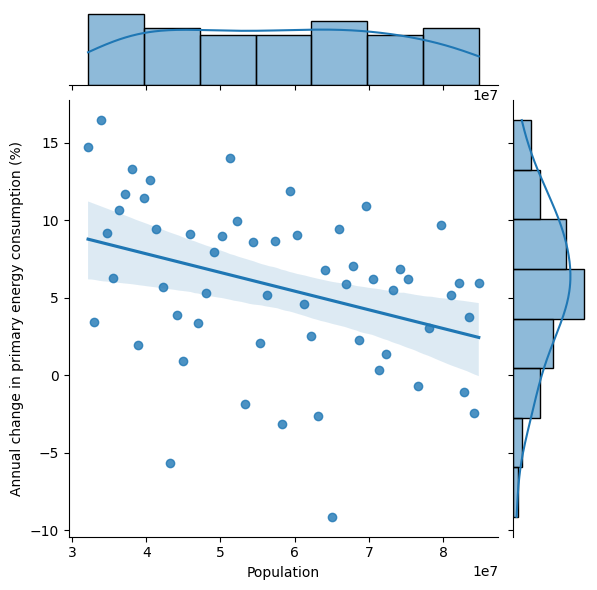

In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

current_directory = os.getcwd()
path_to_energy_consumption_file = os.path.join(current_directory, 'change-energy-consumption.csv')
path_to_population_file = os.path.join(current_directory, 'population-and-demography.csv')

#path_to_energy_consumption_file = '/content/change-energy-consumption.csv'
#path_to_population_file = '/content/population-and-demography.csv'

# Read csv
energy_df = pd.read_csv(path_to_energy_consumption_file)
population_df = pd.read_csv(path_to_population_file)

# Filter for Turkey
energy_df = energy_df[energy_df['Entity'] == 'Turkey']
population_df = population_df[population_df['Country name'] == 'Turkey']

# merge
merged_df = pd.merge(population_df, energy_df, on='Year')

# jointplot
sns.jointplot(x='Population', y='Annual change in primary energy consumption (%)', data=merged_df, kind='reg')

# Coef.
correlation_coefficient = merged_df['Population'].corr(merged_df['Annual change in primary energy consumption (%)'])
print(f'Correlation coefficient: {correlation_coefficient}')

plt.show()

This Python code visualizes the relationship between Turkey's population growth and the annual change in energy consumption and calculates the correlation between these two variables. The datasets are read in CSV format, the data about Turkey is selected and combined via the 'Year' column. Using the Seaborn library, a scatterplot is created. The annual change in population and energy consumption is visualized on the plot.

Correlation coefficient: -0.3645840059754681


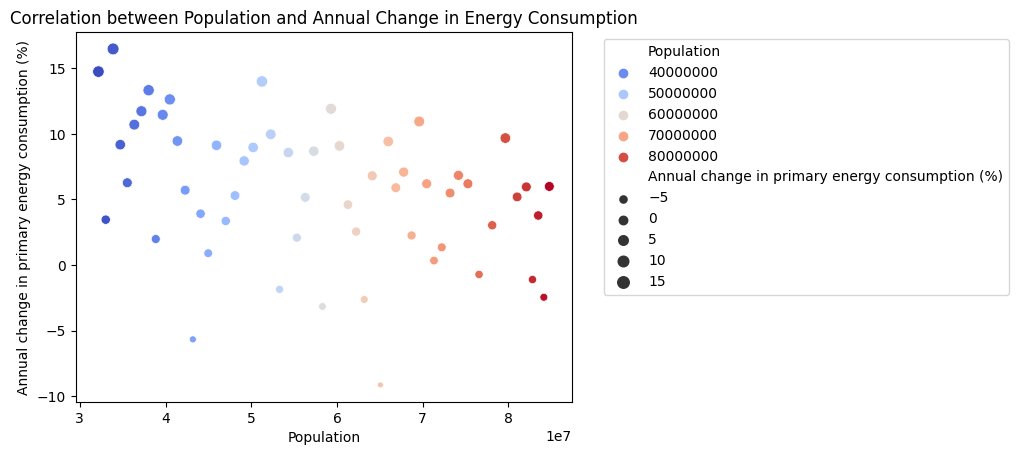

In [2]:

#path_to_energy_consumption_file = '/content/change-energy-consumption.csv'
#path_to_population_file = '/content/population-and-demography.csv'


# Read CSV
energy_df = pd.read_csv(path_to_energy_consumption_file)
population_df = pd.read_csv(path_to_population_file)

# Filter for Turkey
energy_df = energy_df[energy_df['Entity'] == 'Turkey']
population_df = population_df[population_df['Country name'] == 'Turkey']

# Merge
merged_df = pd.merge(population_df, energy_df, on='Year')

# Create a scatter plot with a heatmap
sns.scatterplot(x='Population', y='Annual change in primary energy consumption (%)', data=merged_df, hue='Population', size='Annual change in primary energy consumption (%)', palette='coolwarm')

# Calculate correlation coefficient
correlation_coefficient = merged_df['Population'].corr(merged_df['Annual change in primary energy consumption (%)'])
print(f'Correlation coefficient: {correlation_coefficient}')

plt.xlabel('Population')
plt.ylabel('Annual change in primary energy consumption (%)')
plt.title('Correlation between Population and Annual Change in Energy Consumption')

# Move the legend outside the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

This Python code visualizes the relationship between Turkey's population growth and consumption of different types of energy. Different types of energy ('Geo Biomass Other', 'Biofuels Consumption', 'Solar Consumption', 'Wind Consumption', 'Hydro Consumption', 'Nuclear' Consumption', 'Gas Consumption', 'Coal Consumption', 'Oil Consumption') a series of graphs is created showing population and energy consumption over the years. Each graph shows the relationship between consumption of a particular type of energy (red line) and population growth (blue line).

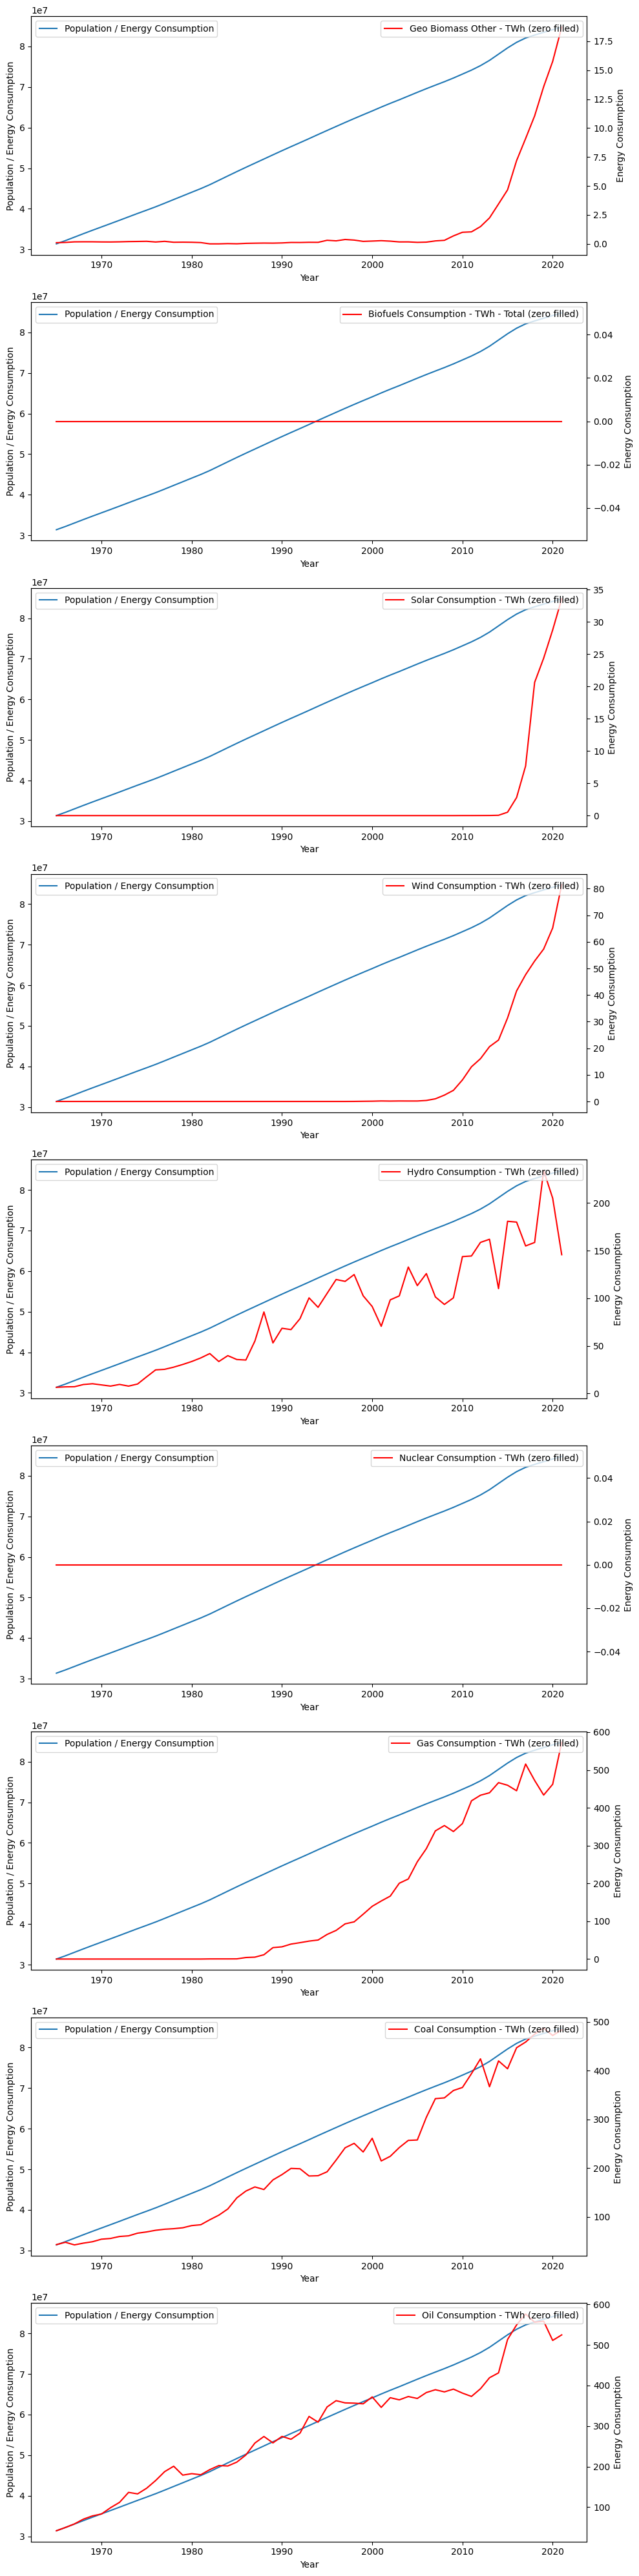

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

current_directory = os.getcwd()

energy_file_name = 'energy-consumption-by-source-and-country.csv'
population_file_name = 'population-and-demography.csv'

path_to_energy_consumption_file = os.path.join(current_directory, energy_file_name)
path_to_population_file = os.path.join(current_directory, population_file_name)


energy_df = pd.read_csv(path_to_energy_consumption_file)
population_df = pd.read_csv(path_to_population_file)


energy_df = energy_df[energy_df['Entity'] == 'Turkey']
population_df = population_df[population_df['Country name'] == 'Turkey']


merged_df = pd.merge(population_df, energy_df, on='Year')


energy_types = ['Geo Biomass Other - TWh (zero filled)', 
                'Biofuels Consumption - TWh - Total (zero filled)', 
                'Solar Consumption - TWh (zero filled)', 
                'Wind Consumption - TWh (zero filled)', 
                'Hydro Consumption - TWh (zero filled)', 
                'Nuclear Consumption - TWh (zero filled)', 
                'Gas Consumption - TWh (zero filled)', 
                'Coal Consumption - TWh (zero filled)', 
                'Oil Consumption - TWh (zero filled)']


fig, axs = plt.subplots(len(energy_types), 1, figsize=(10, 40))

for i, energy_type in enumerate(energy_types):
    axs[i].plot(merged_df['Year'], merged_df['Population'], label='Population / Energy Consumption')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Population / Energy Consumption')
    axs[i].legend()

    twin_ax = axs[i].twinx()
    twin_ax.plot(merged_df['Year'], merged_df[energy_type], color='red', label=energy_type)
    twin_ax.set_ylabel('Energy Consumption')
    twin_ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


This code generates a line graph showing Turkey's population and annual energy consumption change rate. The x-axis of the graph was determined as 'Year' and the y-axis was determined separately for two different lines representing two different scales. The line drawn in blue represents the population, while the line drawn in red represents the annual rate of change in energy consumption.

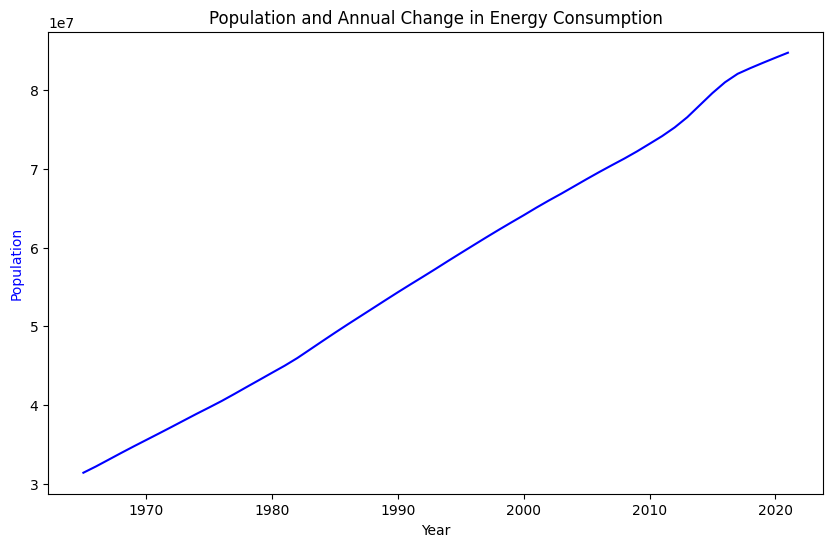

In [11]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(merged_df['Year'], merged_df['Population'], color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color='b')

if 'Annual change in primary energy consumption (%)' in merged_df.columns:
    ax2 = ax1.twinx()
    ax2.plot(merged_df['Year'], merged_df['Annual change in primary energy consumption (%)'], color='r')
    ax2.set_ylabel('Annual change in primary energy consumption (%)', color='r')

plt.title('Population and Annual Change in Energy Consumption')
plt.show()


This code creates a bar graph representing Turkey's population by year. Data is read from CSV files, data for Turkey is filtered, and population information is visualized by years with bars.

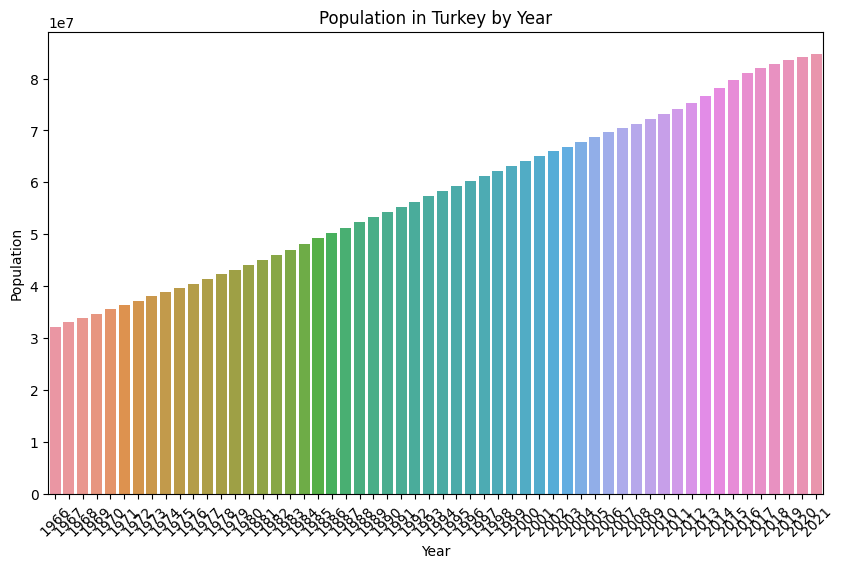

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

current_directory = os.getcwd()
path_to_energy_consumption_file = os.path.join(current_directory, 'change-energy-consumption.csv')
path_to_population_file = os.path.join(current_directory, 'population-and-demography.csv')

# Read CSV
energy_df = pd.read_csv(path_to_energy_consumption_file)
population_df = pd.read_csv(path_to_population_file)

# Filter for Turkey
energy_df = energy_df[energy_df['Entity'] == 'Turkey']
population_df = population_df[population_df['Country name'] == 'Turkey']

# Merge dataframes
merged_df = pd.merge(population_df, energy_df, on='Year')

# Bar plot: Population by Year
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Population', data=merged_df)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population in Turkey by Year')
plt.xticks(rotation=45)
plt.show()






This code creates a bar graph representing the annual change in primary energy consumption in Turkey over the years. The graph visualizes the change in energy consumption over the years and helps us understand the distribution of the data.

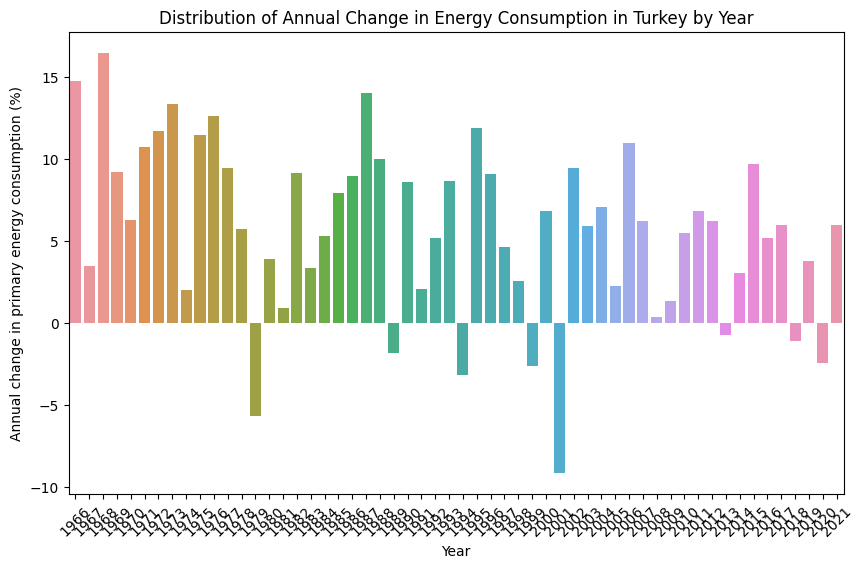

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Annual change in primary energy consumption (%)', data=merged_df)
plt.xlabel('Year')
plt.ylabel('Annual change in primary energy consumption (%)')
plt.title('Distribution of Annual Change in Energy Consumption in Turkey by Year')
plt.xticks(rotation=45)
plt.show()


This code visualizes the energy consumption per capita in Turkey over the years and helps us analyze the variation of this consumption between years.

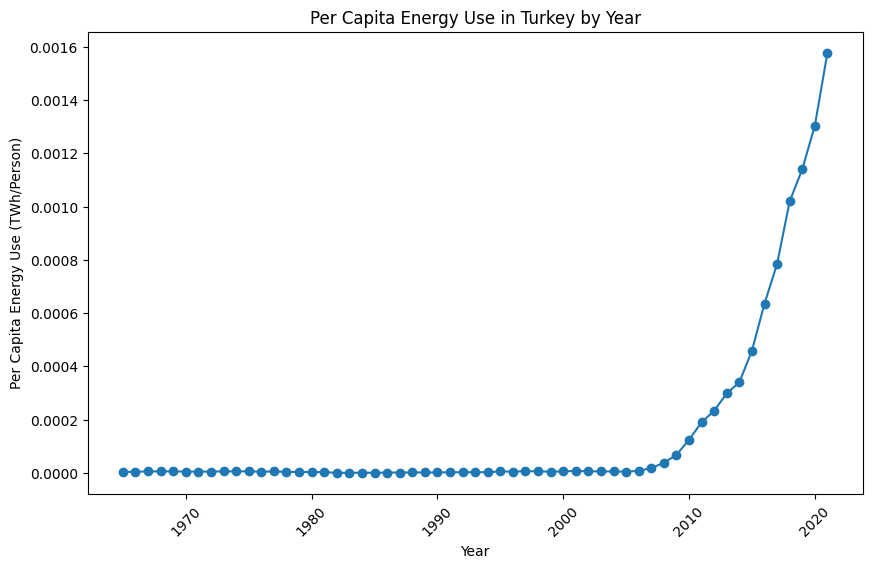

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os

current_directory = os.getcwd()
path_to_energy_consumption_file = os.path.join(current_directory, 'energy-consumption-by-source-and-country.csv')
path_to_population_file = os.path.join(current_directory, 'population-and-demography.csv')

# Read CSV
energy_df = pd.read_csv(path_to_energy_consumption_file)
population_df = pd.read_csv(path_to_population_file)

# Filter for Turkey
energy_df = energy_df[energy_df['Entity'] == 'Turkey']
population_df = population_df[population_df['Country name'] == 'Turkey']

# Merge dataframes
merged_df = pd.merge(energy_df, population_df, on='Year')

# Calculate total energy consumption and population
merged_df['Total Energy Consumption'] = merged_df['Geo Biomass Other - TWh (zero filled)'] + merged_df['Biofuels Consumption - TWh - Total (zero filled)'] + merged_df['Solar Consumption - TWh (zero filled)'] + merged_df['Wind Consumption - TWh (zero filled)']
merged_df['Population'] = merged_df['Population'] / 1000  # Convert population to thousands

# Calculate per capita energy use
merged_df['Per Capita Energy Use'] = merged_df['Total Energy Consumption'] / merged_df['Population']

# Line plot: Per Capita Energy Use by Year
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Year'], merged_df['Per Capita Energy Use'], marker='o')
plt.xlabel('Year')
plt.ylabel('Per Capita Energy Use (TWh/Person)')
plt.title('Per Capita Energy Use in Turkey by Year')
plt.xticks(rotation=45)
plt.show()


This code visualizes annual energy consumption by sources in Turkey and helps us understand the contribution of different energy sources to total energy consumption.

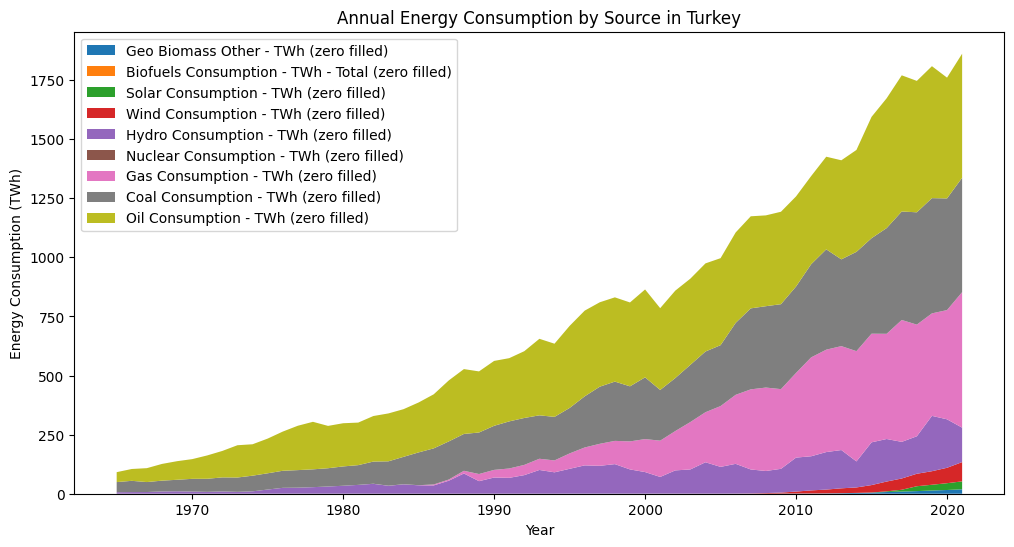

In [15]:
plt.figure(figsize=(12, 6))
plt.stackplot(merged_df['Year'], merged_df[energy_types].T, labels=energy_types)
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.title('Annual Energy Consumption by Source in Turkey')
plt.legend(loc='upper left')
plt.show()


This code visualizes the distribution of energy consumption per capita in Turkey with a histogram and a boxplot of energy consumption per capita by years. These charts help us understand the distribution of energy consumption and observe the differences between years.

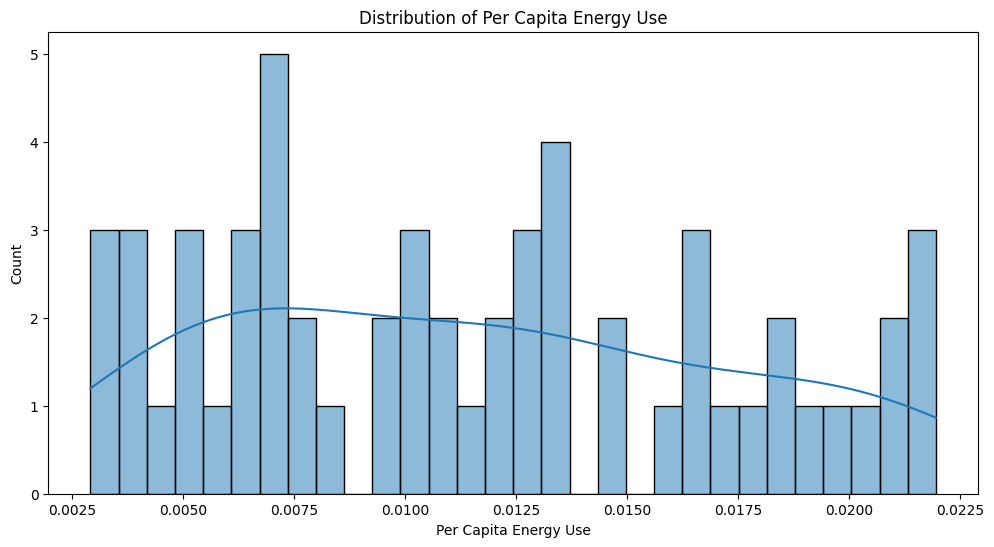

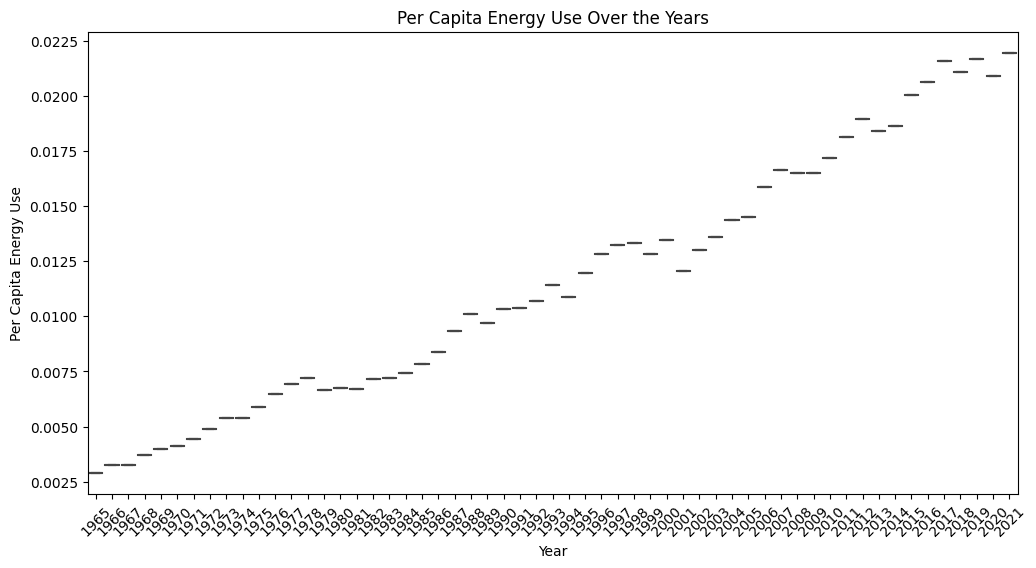

In [16]:
merged_df['Total Energy Consumption'] = merged_df[energy_types].sum(axis=1)
merged_df['Per Capita Energy Use'] = merged_df['Total Energy Consumption'] / merged_df['Population']
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['Per Capita Energy Use'], bins=30, kde=True)
plt.title('Distribution of Per Capita Energy Use')
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_df['Year'], y=merged_df['Per Capita Energy Use'])
plt.title('Per Capita Energy Use Over the Years')
plt.xticks(rotation=45)
plt.show()



This code shows the distribution of energy consumption in Turkey by resources in a given year as a pie chart. This chart helps us understand the ratios between resources in energy consumption.

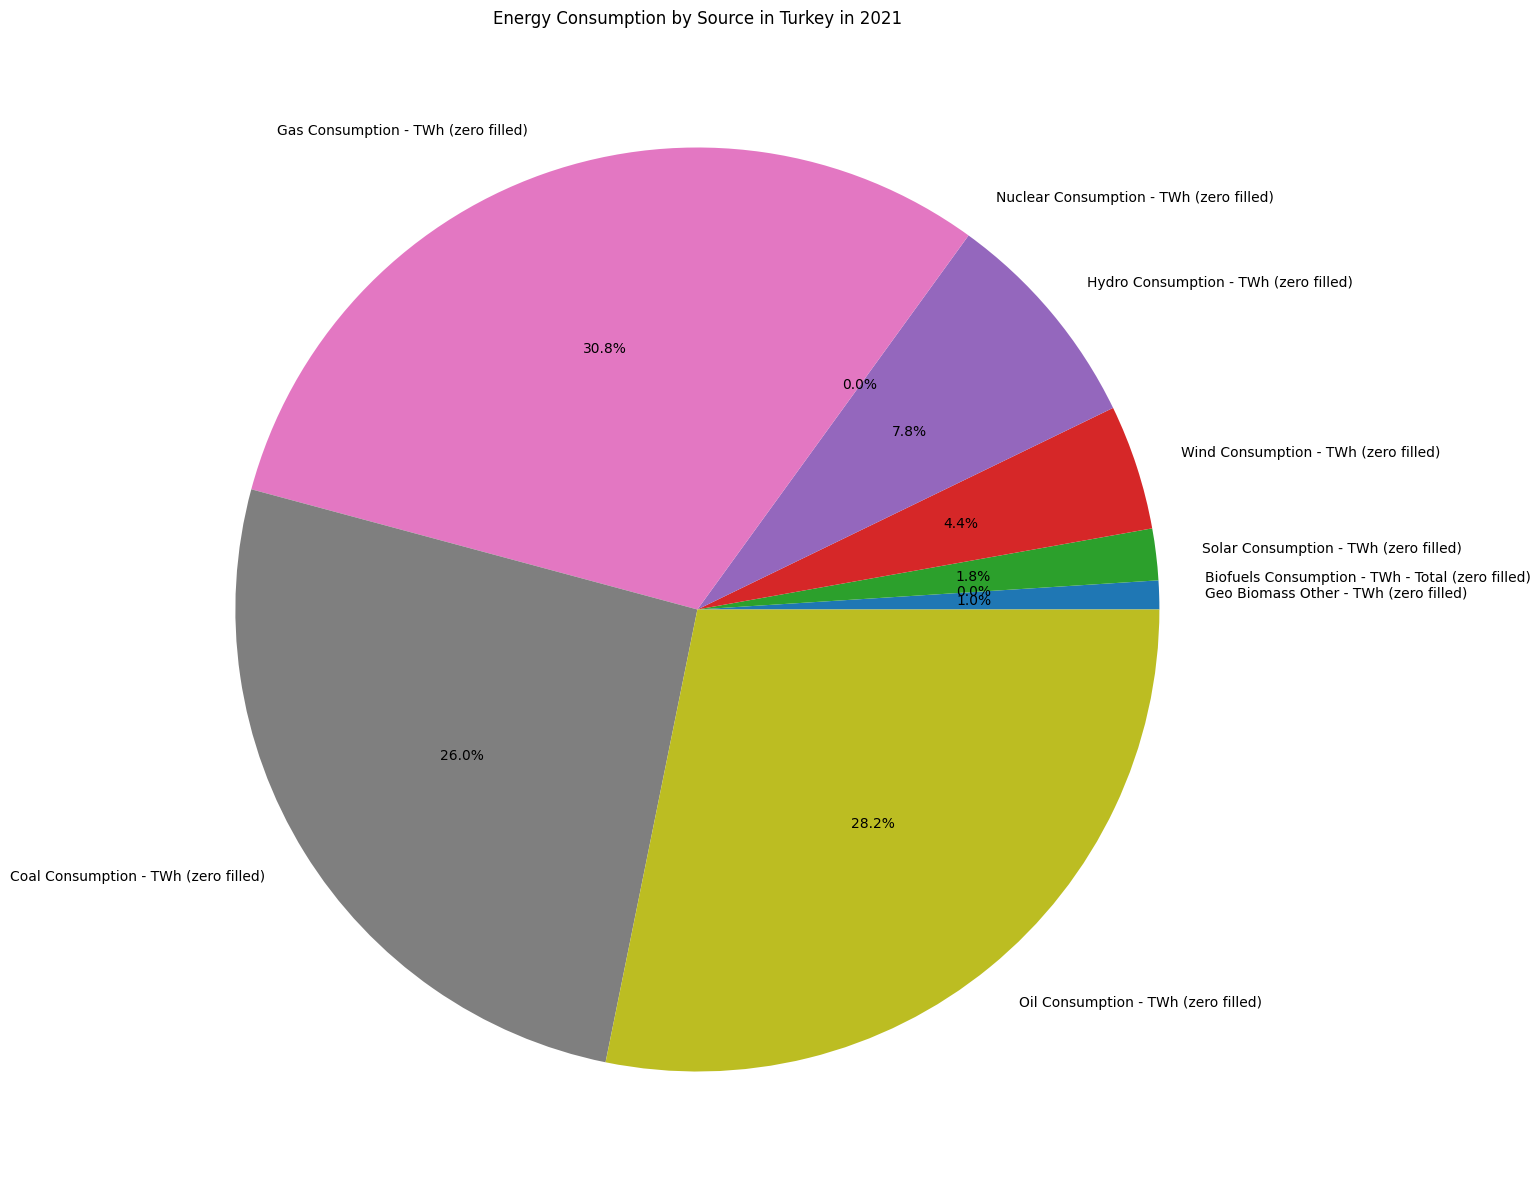

In [17]:
year = 2021  
data_for_year = merged_df[merged_df['Year'] == year].iloc[0]
energy_sources = data_for_year[energy_types]

plt.figure(figsize=(20, 15))
plt.pie(energy_sources, labels=energy_types, autopct='%1.1f%%')
plt.title(f'Energy Consumption by Source in Turkey in {year}')
plt.show()


This code shows the annual energy consumption in Turkey as a bar graph by source. The graph visualizes the contribution of different energy sources to total energy consumption over the years and helps us analyze the distribution of energy consumption among sources.

<Figure size 4000x2000 with 0 Axes>

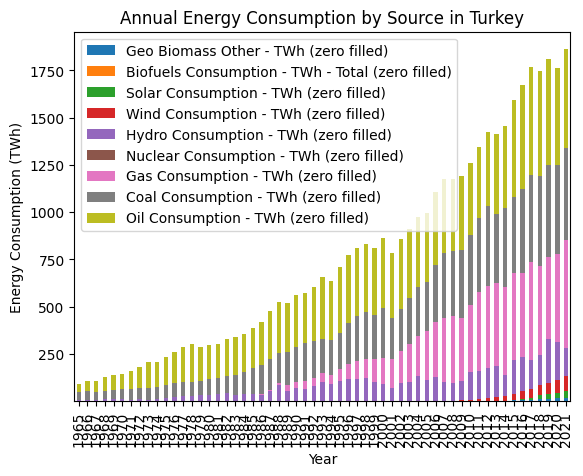

In [18]:
plt.figure(figsize=(40, 20))
merged_df.plot(kind='bar', stacked=True, x='Year', y=energy_types)
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.title('Annual Energy Consumption by Source in Turkey')
plt.show()


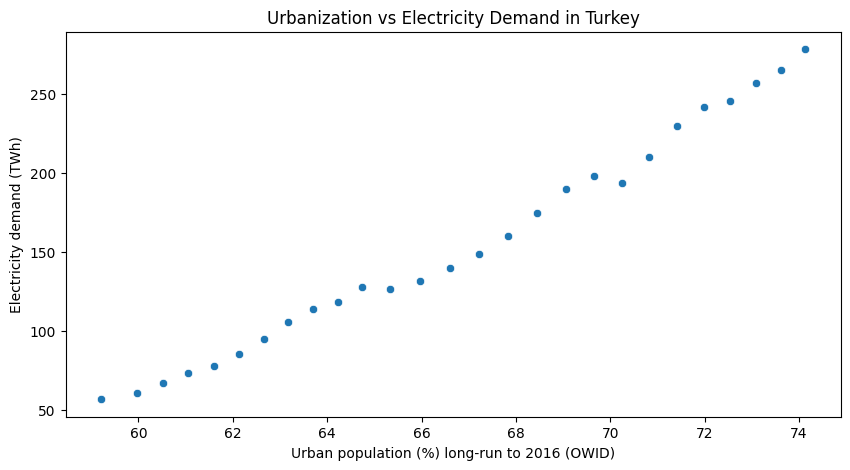

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_dir = os.getcwd()
change_energy_consumption_path = os.path.join(file_dir, "Change-energy-consumption.csv")
electricity_demand_path = os.path.join(file_dir, "Electricity-demand.csv")
energy_consumption_by_source_and_country_path = os.path.join(file_dir, "energy-consumption-by-source-and-country.csv")
per_capita_energy_use_path = os.path.join(file_dir, "per-capita-energy-use.csv")
population_and_demography_path = os.path.join(file_dir, "population-and-demography.csv")
primary_energy_renewables_path = os.path.join(file_dir, "primary-energy-renewables.csv")
primary_energy_cons_path = os.path.join(file_dir, "primary-energy-cons.csv")
urban_population_share_2050_path = os.path.join(file_dir, "urban-population-share-2050.csv")
urbanization_last_500_years_path = os.path.join(file_dir, "urbanization-last-500-years.csv")
number_of_internet_users_path = os.path.join(file_dir, "number-of-internet-users.csv")

# Load the datasets
change_energy_consumption = pd.read_csv(change_energy_consumption_path)
electricity_demand = pd.read_csv(electricity_demand_path)
energy_consumption_by_source_and_country = pd.read_csv(energy_consumption_by_source_and_country_path)
per_capita_energy_use = pd.read_csv(per_capita_energy_use_path)
population_and_demography = pd.read_csv(population_and_demography_path)
primary_energy_renewables = pd.read_csv(primary_energy_renewables_path)
primary_energy_cons = pd.read_csv(primary_energy_cons_path)
urban_population_share_2050 = pd.read_csv(urban_population_share_2050_path)
urbanization_last_500_years = pd.read_csv(urbanization_last_500_years_path)
number_of_internet_users = pd.read_csv(number_of_internet_users_path)

turkey_electricity_demand = electricity_demand[electricity_demand['Entity'] == 'Turkey']
turkey_population = population_and_demography[population_and_demography['Country name'] == 'Turkey']
turkey_urbanization = urbanization_last_500_years[urbanization_last_500_years['Entity'] == 'Turkey']
turkey_internet_users = number_of_internet_users[number_of_internet_users['Entity'] == 'Turkey']

merged_df = pd.merge(turkey_population, turkey_electricity_demand, how='inner', on='Year')
merged_df = pd.merge(merged_df, turkey_urbanization, how='inner', on='Year')
merged_df = pd.merge(merged_df, turkey_internet_users, how='inner', on='Year')



plt.figure(figsize=(10, 5))
sns.scatterplot(data=merged_df, x='Urban population (%) long-run to 2016 (OWID)', y='Electricity demand (TWh)')
plt.title('Urbanization vs Electricity Demand in Turkey')
plt.show()







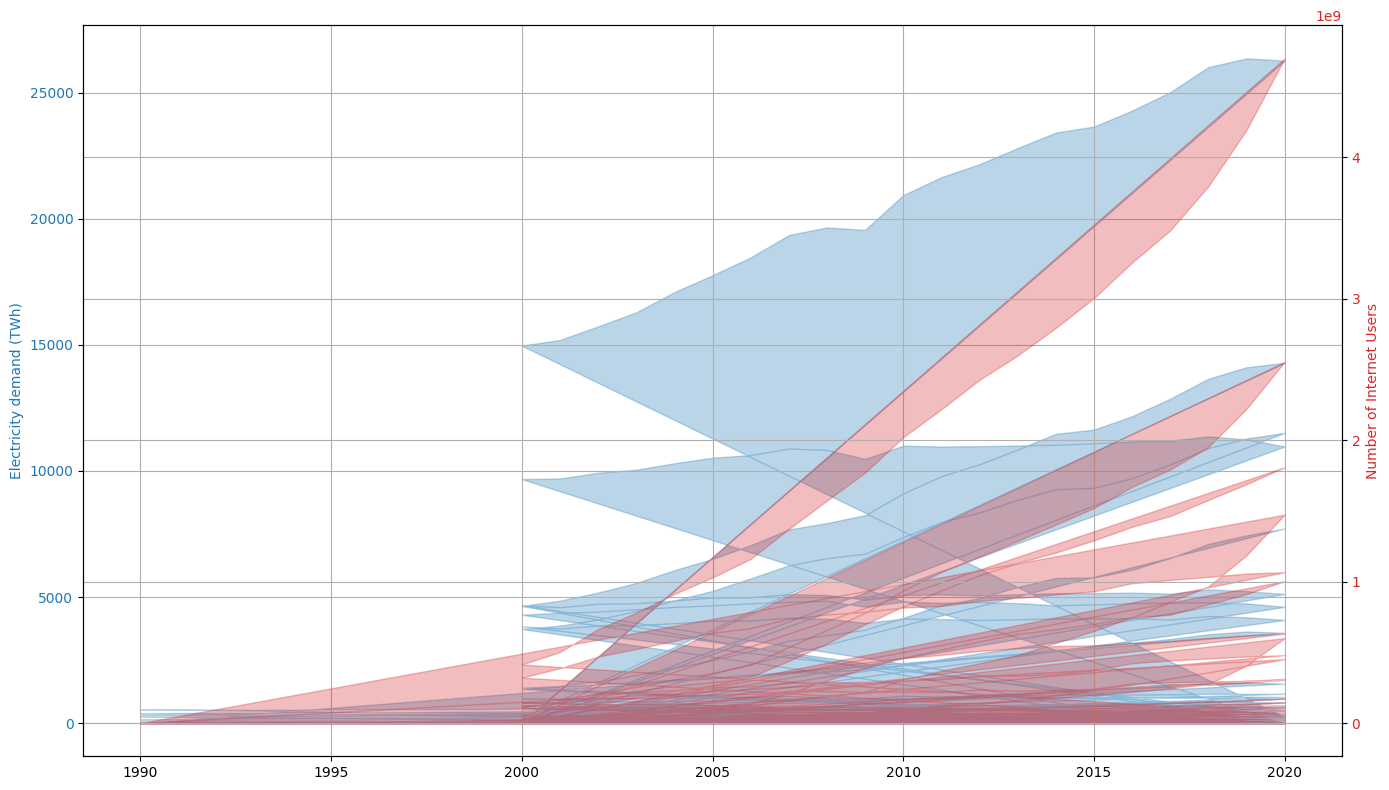

In [20]:
elec_demand = pd.read_csv('Electricity-demand.csv')
energy_renew = pd.read_csv('primary-energy-renewables.csv')
energy_cons = pd.read_csv('primary-energy-cons.csv')
energy_src = pd.read_csv('energy-consumption-by-source-and-country.csv')
merged = pd.merge(elec_demand, number_of_internet_users, on=['Entity', 'Code', 'Year'])
fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
ax1.fill_between(merged['Year'], merged['Electricity demand (TWh)'], color=color, alpha=0.3)
ax1.set_ylabel('Electricity demand (TWh)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.fill_between(merged['Year'], merged['Number of Internet users'], color=color, alpha=0.3)
ax2.set_ylabel('Number of Internet Users', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(True)

fig.tight_layout()
plt.show()




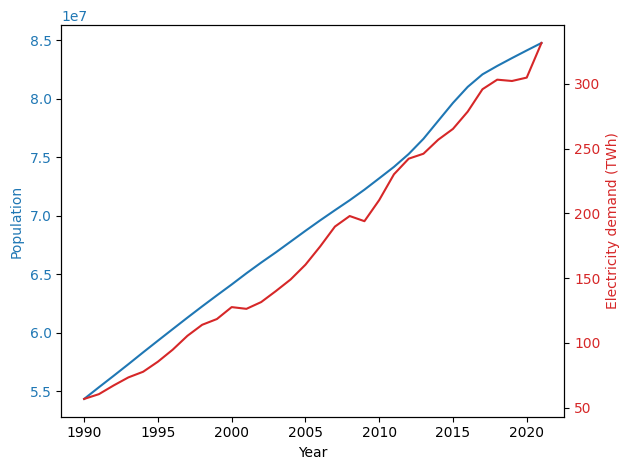

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_dir = os.getcwd()
electricity_demand_path = os.path.join(file_dir, "electricity-demand.csv")
change_energy_consumption_path = os.path.join(file_dir, "change-energy-consumption.csv")
population_and_demography_path = os.path.join(file_dir, "population-and-demography.csv")
per_capita_energy_use_path = os.path.join(file_dir, "per-capita-energy-use.csv")
energy_consumption_by_source_and_country_path = os.path.join(file_dir, "energy-consumption-by-source-and-country.csv")

electricity_demand = pd.read_csv(electricity_demand_path)
change_energy_consumption = pd.read_csv(change_energy_consumption_path)
population_and_demography = pd.read_csv(population_and_demography_path)
per_capita_energy_use = pd.read_csv(per_capita_energy_use_path)
energy_consumption_by_source_and_country = pd.read_csv(energy_consumption_by_source_and_country_path)

combined_data = pd.merge(electricity_demand, population_and_demography, how='inner', left_on=['Entity', 'Year'], right_on=['Country name', 'Year'])


turkey_data = combined_data[combined_data['Entity'] == 'Turkey']

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color=color)
ax1.plot(turkey_data['Year'], turkey_data['Population'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Electricity demand (TWh)', color=color)  
ax2.plot(turkey_data['Year'], turkey_data['Electricity demand (TWh)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()



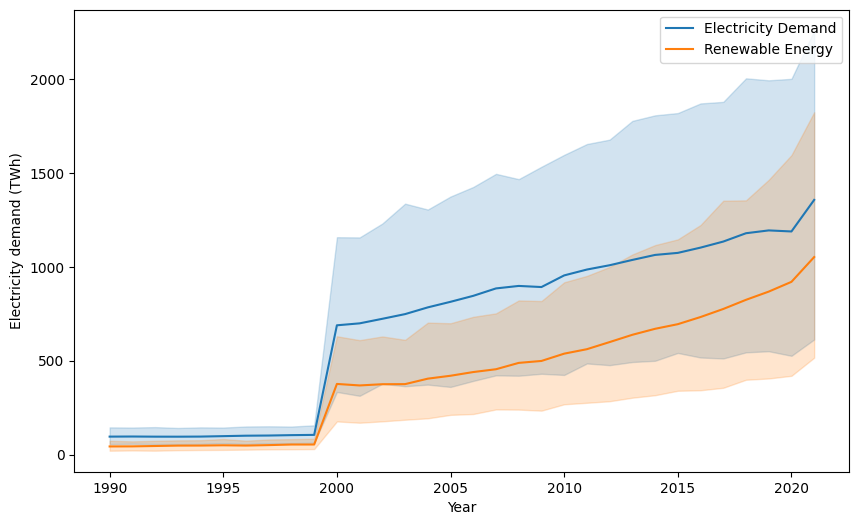

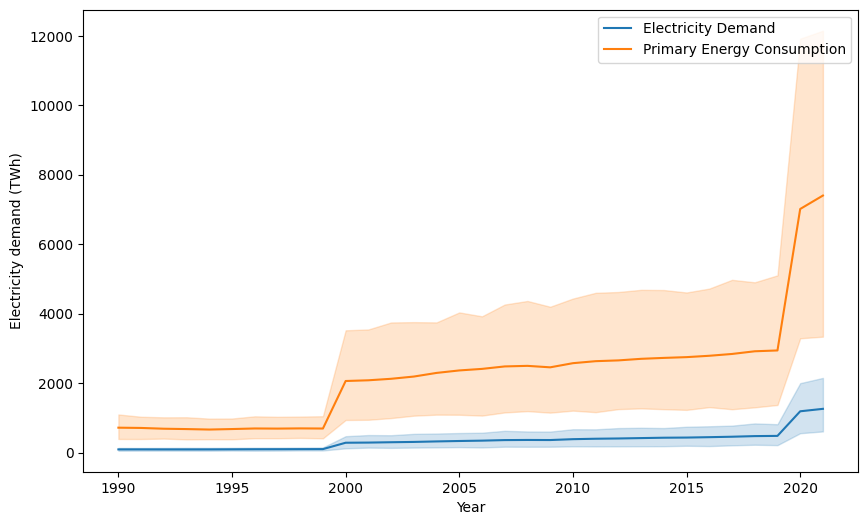

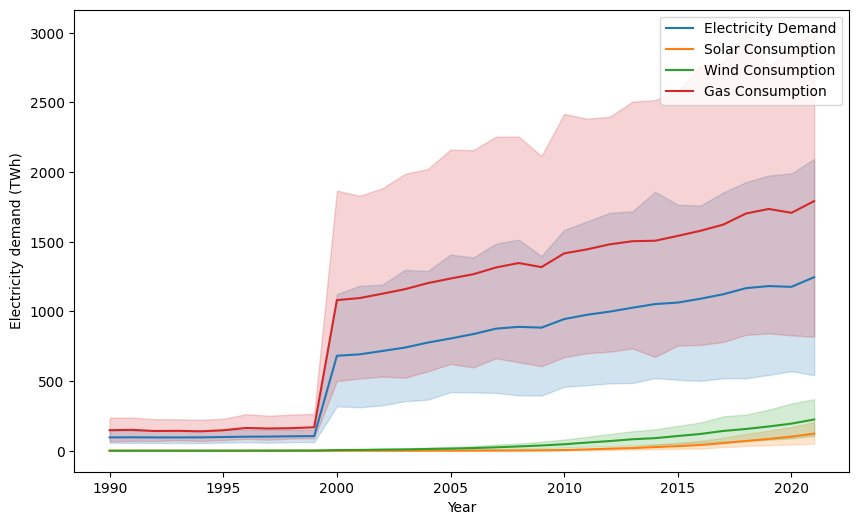

In [22]:
elec_demand = pd.read_csv('Electricity-demand.csv')
energy_renew = pd.read_csv('primary-energy-renewables.csv')
energy_cons = pd.read_csv('primary-energy-cons.csv')
energy_src = pd.read_csv('energy-consumption-by-source-and-country.csv')



merged = pd.merge(elec_demand, energy_renew, on=['Entity', 'Code', 'Year'])

plt.figure(figsize=(10,6))
sns.lineplot(data=merged, x='Year', y='Electricity demand (TWh)', label='Electricity Demand')
sns.lineplot(data=merged, x='Year', y='Renewables (TWh - equivalent)', label='Renewable Energy')
plt.legend()
plt.show()

merged = pd.merge(elec_demand, energy_cons, on=['Entity', 'Code', 'Year'])

plt.figure(figsize=(10,6))
sns.lineplot(data=merged, x='Year', y='Electricity demand (TWh)', label='Electricity Demand')
sns.lineplot(data=merged, x='Year', y='Primary energy consumption (TWh)', label='Primary Energy Consumption')
plt.legend()
plt.show()
merged = pd.merge(elec_demand, energy_src, on=['Entity', 'Code', 'Year'])

plt.figure(figsize=(10,6))
sns.lineplot(data=merged, x='Year', y='Electricity demand (TWh)', label='Electricity Demand')
sns.lineplot(data=merged, x='Year', y='Solar Consumption - TWh (zero filled)', label='Solar Consumption')
sns.lineplot(data=merged, x='Year', y='Wind Consumption - TWh (zero filled)', label='Wind Consumption')
sns.lineplot(data=merged, x='Year', y='Gas Consumption - TWh (zero filled)', label='Gas Consumption')
plt.legend()
plt.show()



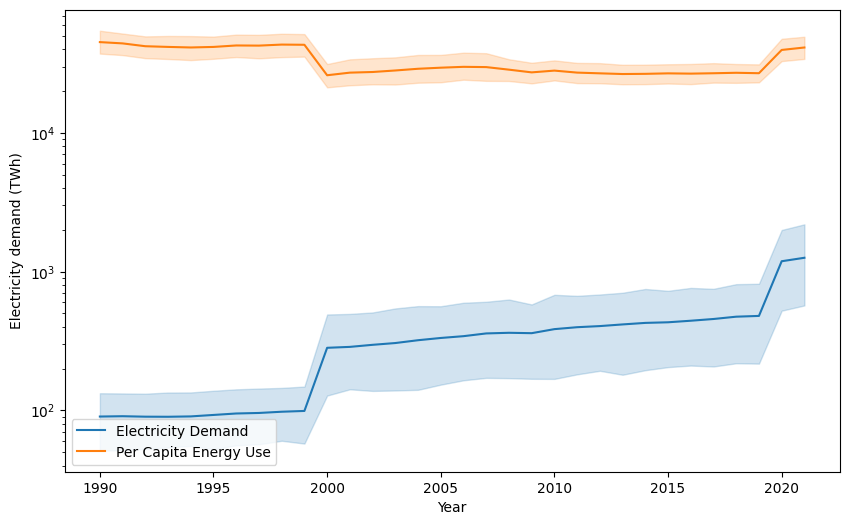

In [23]:
merged = pd.merge(elec_demand, per_capita_energy_use, on=['Entity', 'Code', 'Year'])

plt.figure(figsize=(10,6))
sns.lineplot(data=merged, x='Year', y='Electricity demand (TWh)', label='Electricity Demand')
sns.lineplot(data=merged, x='Year', y='Primary energy consumption per capita (kWh/person)', label='Per Capita Energy Use')
plt.yscale("log") 
plt.legend()
plt.show()


This code is used to visualize the relationships between variables such as Turkey's urbanization, population, electricity demand and internet usage.

This code creates a 2D histogram that shows the distribution between Turkey's population and electricity demand. The histogram represents the density in different parts of the population with colored boxes. Regions of high density appear darker, while regions of low density appear lighter. Thus, you can visually assess the intensity and distribution of the relationship between population and electricity demand.

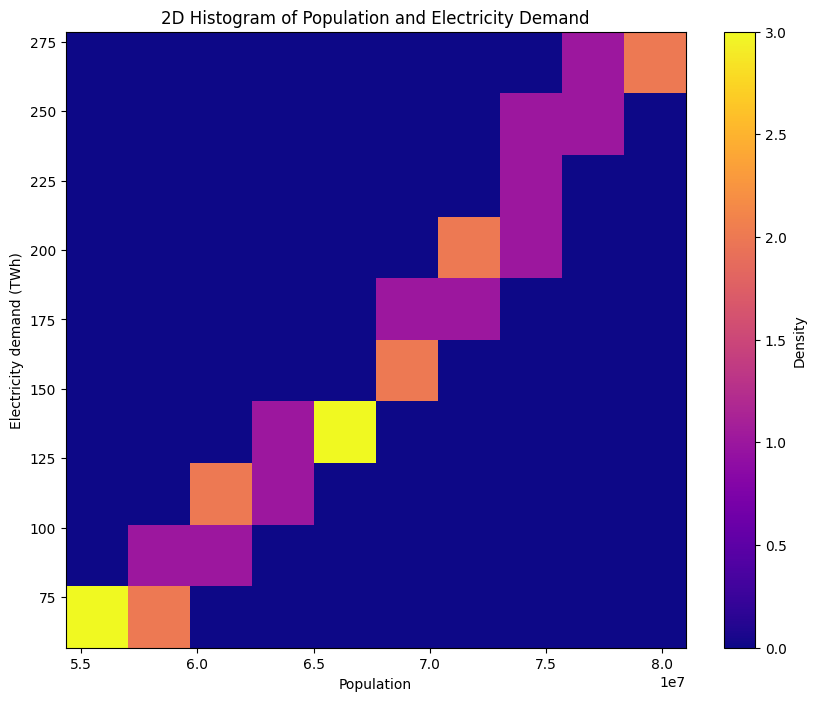

In [24]:
# Hist2D
plt.figure(figsize=(10, 8))
plt.hist2d(x=merged_df['Population'], y=merged_df['Electricity demand (TWh)'], cmap='plasma')
plt.colorbar(label='Density')
plt.title('2D Histogram of Population and Electricity Demand')
plt.xlabel('Population')
plt.ylabel('Electricity demand (TWh)')
plt.show()


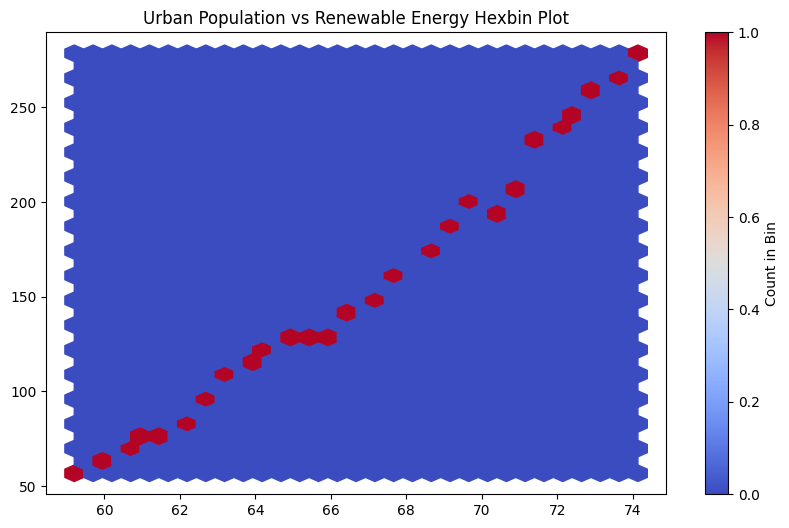

In [30]:
plt.figure(figsize=(10, 6))
plt.hexbin(x=merged_df['Urban population (%) long-run to 2016 (OWID)'], y=merged_df['Electricity demand (TWh)'], gridsize=30, cmap='coolwarm')
plt.colorbar(label='Count in Bin')
plt.title('Urban Population vs Renewable Energy Hexbin Plot')
plt.show()


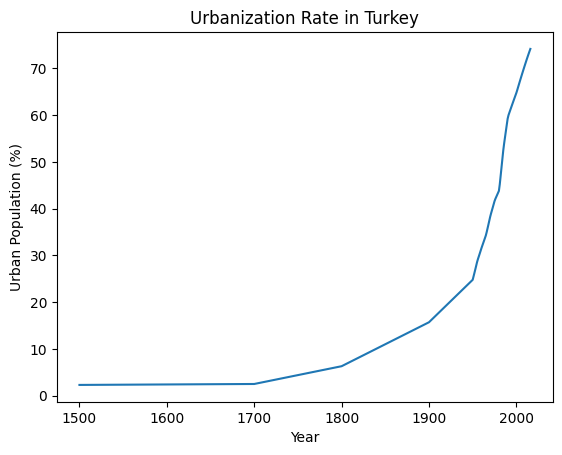

In [31]:
urbanization_file = 'urbanization-last-500-years.csv'
urbanization_df = pd.read_csv(os.path.join(current_directory, urbanization_file))

turkey_urbanization_df = urbanization_df[urbanization_df['Entity'] == 'Turkey']

plt.plot(turkey_urbanization_df['Year'], turkey_urbanization_df['Urban population (%) long-run to 2016 (OWID)'])
plt.xlabel('Year')
plt.ylabel('Urban Population (%)')
plt.title('Urbanization Rate in Turkey')
plt.show()


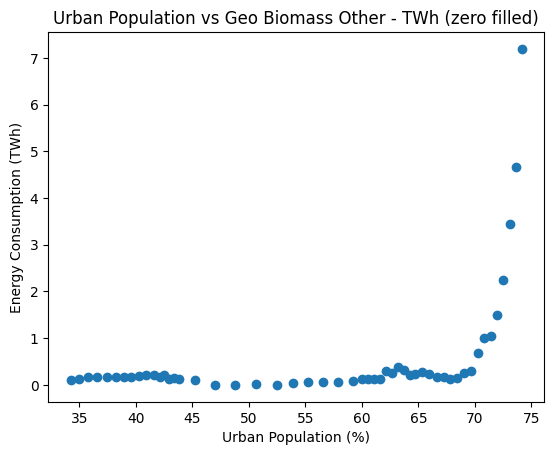

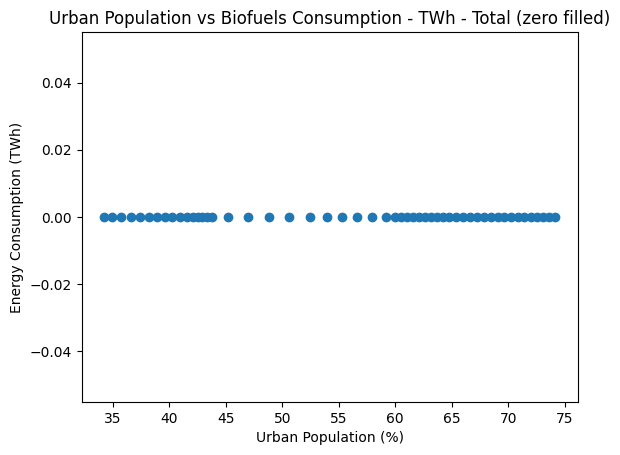

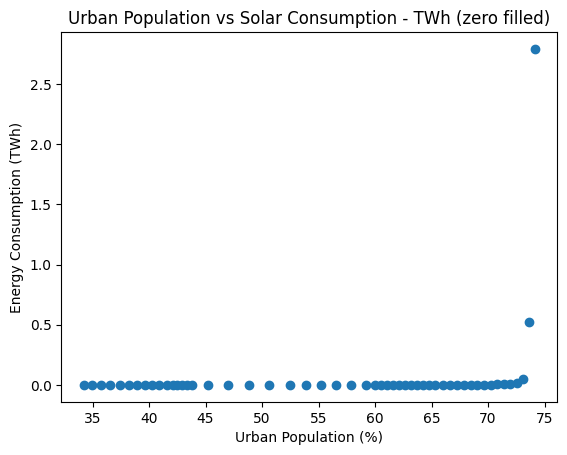

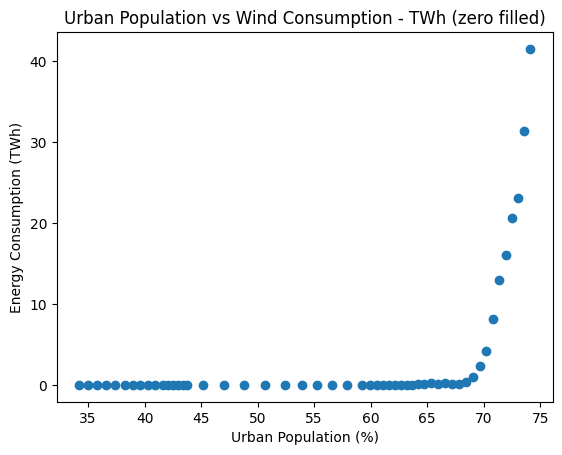

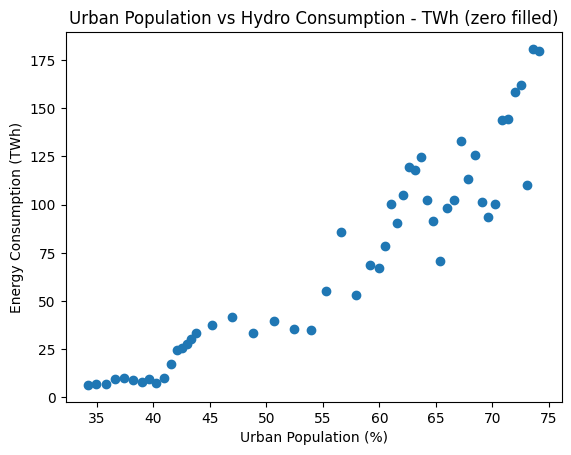

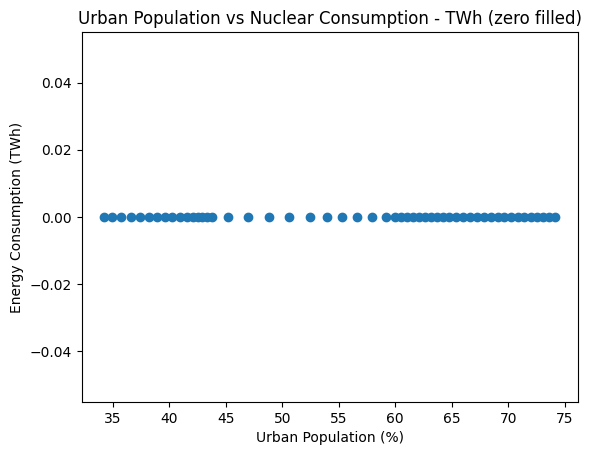

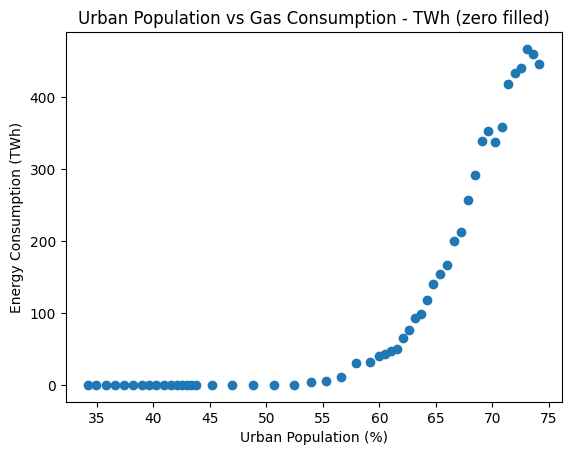

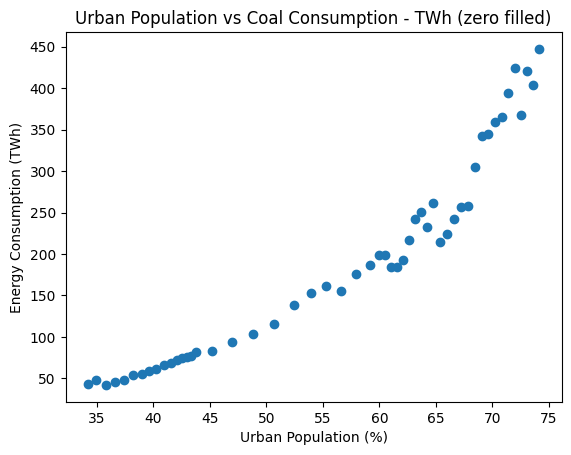

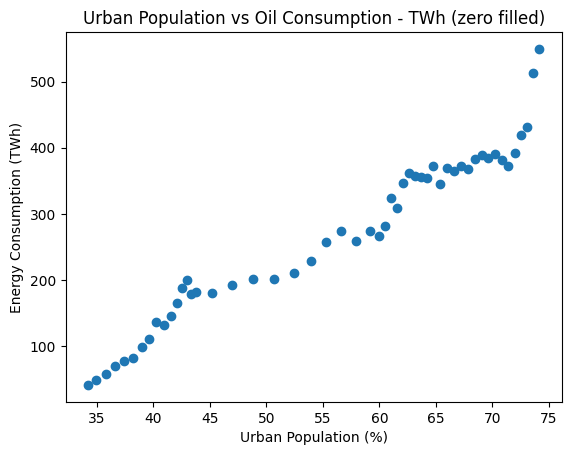

Correlation coefficient for Geo Biomass Other - TWh (zero filled): 0.4478256775718327
Correlation coefficient for Biofuels Consumption - TWh - Total (zero filled): nan
Correlation coefficient for Solar Consumption - TWh (zero filled): 0.24159394009296423
Correlation coefficient for Wind Consumption - TWh (zero filled): 0.49853105269800174
Correlation coefficient for Hydro Consumption - TWh (zero filled): 0.9383393128070113
Correlation coefficient for Nuclear Consumption - TWh (zero filled): nan
Correlation coefficient for Gas Consumption - TWh (zero filled): 0.8186601549747784
Correlation coefficient for Coal Consumption - TWh (zero filled): 0.9481021048057151
Correlation coefficient for Oil Consumption - TWh (zero filled): 0.9747350882417607


In [32]:

urbanization_file = 'urbanization-last-500-years.csv'
urbanization_df = pd.read_csv(os.path.join(current_directory, urbanization_file))


turkey_urbanization_df = urbanization_df[urbanization_df['Entity'] == 'Turkey']

energy_consumption_file = 'energy-consumption-by-source-and-country.csv'
energy_consumption_df = pd.read_csv(os.path.join(current_directory, energy_consumption_file))


turkey_energy_consumption_df = energy_consumption_df[energy_consumption_df['Entity'] == 'Turkey']


merged_df = pd.merge(turkey_urbanization_df, turkey_energy_consumption_df, on='Year')


columns = ['Geo Biomass Other - TWh (zero filled)', 'Biofuels Consumption - TWh - Total (zero filled)', 'Solar Consumption - TWh (zero filled)', 'Wind Consumption - TWh (zero filled)', 'Hydro Consumption - TWh (zero filled)', 'Nuclear Consumption - TWh (zero filled)', 'Gas Consumption - TWh (zero filled)', 'Coal Consumption - TWh (zero filled)', 'Oil Consumption - TWh (zero filled)']

for column in columns:
    plt.scatter(merged_df['Urban population (%) long-run to 2016 (OWID)'], merged_df[column])
    plt.xlabel('Urban Population (%)')
    plt.ylabel('Energy Consumption (TWh)')
    plt.title(f'Urban Population vs {column}')
    plt.show()
columns = ['Geo Biomass Other - TWh (zero filled)', 'Biofuels Consumption - TWh - Total (zero filled)', 'Solar Consumption - TWh (zero filled)', 'Wind Consumption - TWh (zero filled)', 'Hydro Consumption - TWh (zero filled)', 'Nuclear Consumption - TWh (zero filled)', 'Gas Consumption - TWh (zero filled)', 'Coal Consumption - TWh (zero filled)', 'Oil Consumption - TWh (zero filled)']

for column in columns:
    correlation_coefficient = merged_df['Urban population (%) long-run to 2016 (OWID)'].corr(merged_df[column])
    print(f'Correlation coefficient for {column}: {correlation_coefficient}')


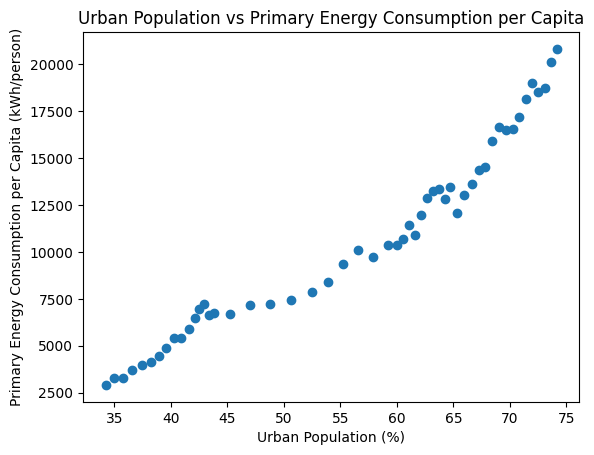

Correlation coefficient: 0.9692912129580693


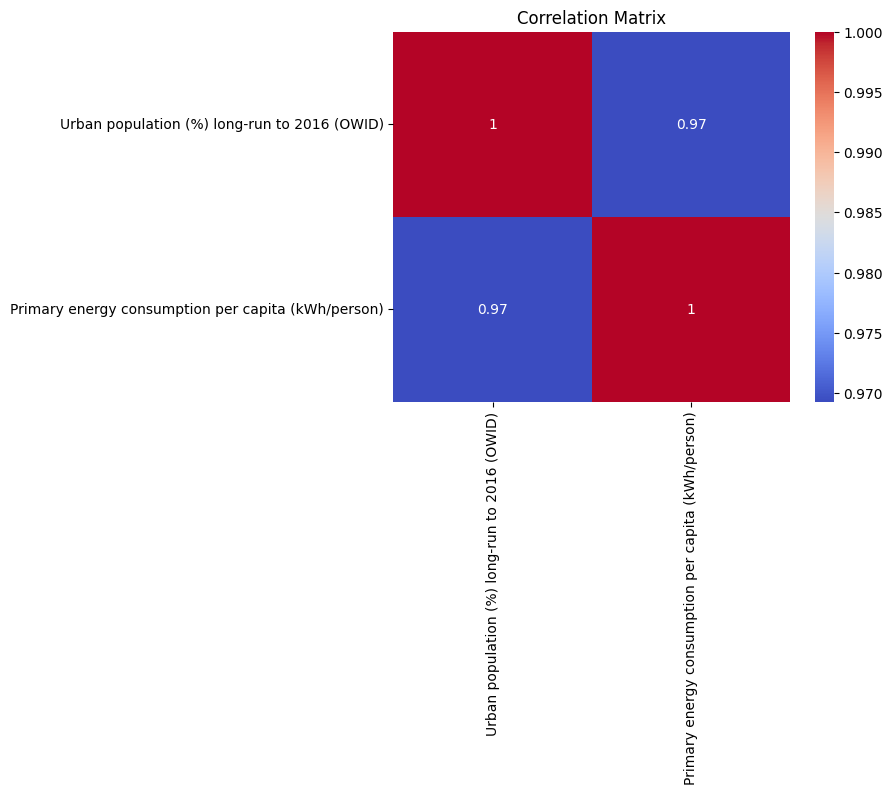

In [33]:

per_capita_energy_file = 'per-capita-energy-use.csv'
per_capita_energy_df = pd.read_csv(os.path.join(current_directory, per_capita_energy_file))


turkey_per_capita_energy_df = per_capita_energy_df[per_capita_energy_df['Entity'] == 'Turkey']


merged_df = pd.merge(turkey_per_capita_energy_df, turkey_urbanization_df, on='Year')


plt.scatter(merged_df['Urban population (%) long-run to 2016 (OWID)'], merged_df['Primary energy consumption per capita (kWh/person)'])
plt.xlabel('Urban Population (%)')
plt.ylabel('Primary Energy Consumption per Capita (kWh/person)')
plt.title('Urban Population vs Primary Energy Consumption per Capita')
plt.show()

correlation_coefficient = merged_df['Urban population (%) long-run to 2016 (OWID)'].corr(merged_df['Primary energy consumption per capita (kWh/person)'])
print(f'Correlation coefficient: {correlation_coefficient}')

import seaborn as sns

correlation_matrix = merged_df[['Urban population (%) long-run to 2016 (OWID)', 'Primary energy consumption per capita (kWh/person)']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



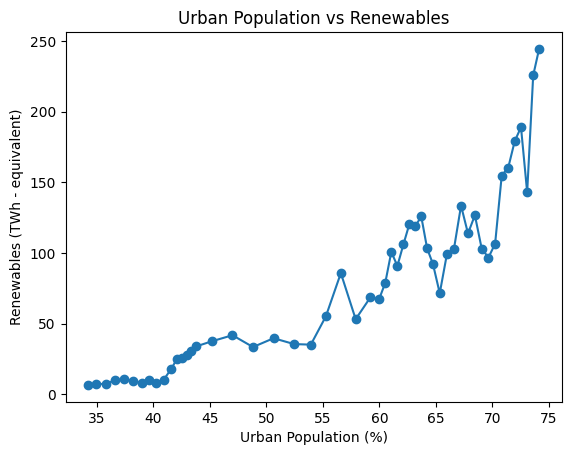

Correlation coefficient: 0.9083607259913209


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import os

current_directory = os.getcwd()


renewables_file = 'primary-energy-renewables.csv'
renewables_df = pd.read_csv(os.path.join(current_directory, renewables_file))


turkey_renewables_df = renewables_df[renewables_df['Entity'] == 'Turkey']

urbanization_file = 'urbanization-last-500-years.csv'
urbanization_df = pd.read_csv(os.path.join(current_directory, urbanization_file))

turkey_urbanization_df = urbanization_df[urbanization_df['Entity'] == 'Turkey']


merged_df = pd.merge(turkey_urbanization_df, turkey_renewables_df, on='Year')


plt.plot(merged_df['Urban population (%) long-run to 2016 (OWID)'], merged_df['Renewables (TWh - equivalent)'], marker='o')
plt.xlabel('Urban Population (%)')
plt.ylabel('Renewables (TWh - equivalent)')
plt.title('Urban Population vs Renewables')
plt.show()
correlation_coefficient = merged_df['Urban population (%) long-run to 2016 (OWID)'].corr(merged_df['Renewables (TWh - equivalent)'])
print(f'Correlation coefficient: {correlation_coefficient}')


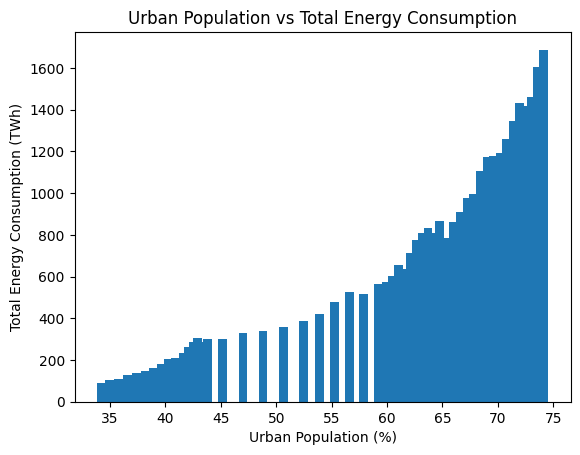

Correlation coefficient: 0.9415976525842662


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import os

current_directory = os.getcwd()


energy_cons_file = 'primary-energy-cons.csv'
energy_cons_df = pd.read_csv(os.path.join(current_directory, energy_cons_file))

turkey_energy_cons_df = energy_cons_df[energy_cons_df['Entity'] == 'Turkey']

urbanization_file = 'urbanization-last-500-years.csv'
urbanization_df = pd.read_csv(os.path.join(current_directory, urbanization_file))


turkey_urbanization_df = urbanization_df[urbanization_df['Entity'] == 'Turkey']


merged_df = pd.merge(turkey_urbanization_df, turkey_energy_cons_df, on='Year')


plt.bar(merged_df['Urban population (%) long-run to 2016 (OWID)'], merged_df['Primary energy consumption (TWh)'])
plt.xlabel('Urban Population (%)')
plt.ylabel('Total Energy Consumption (TWh)')
plt.title('Urban Population vs Total Energy Consumption')
plt.show()
correlation_coefficient = merged_df['Urban population (%) long-run to 2016 (OWID)'].corr(merged_df['Primary energy consumption (TWh)'])
print(f'Correlation coefficient: {correlation_coefficient}')


Correlation coefficient: 0.9799376921031605


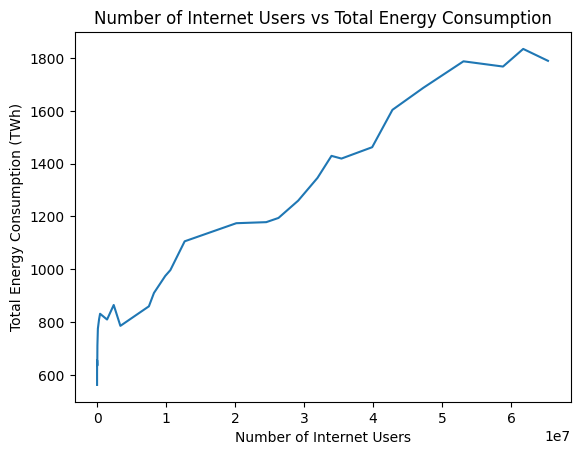

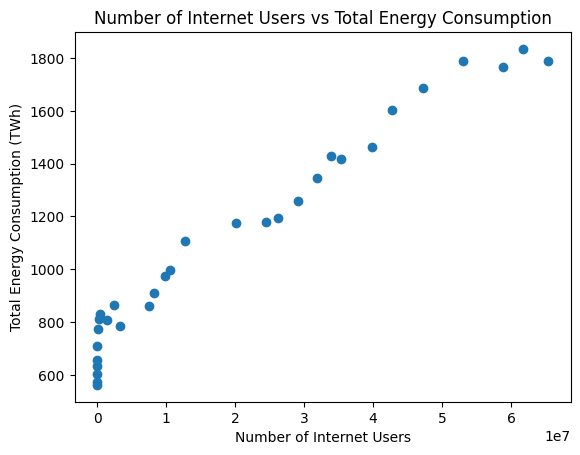

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import os

current_directory = os.getcwd()

internet_users_file = 'number-of-internet-users.csv'
internet_users_df = pd.read_csv(os.path.join(current_directory, internet_users_file))


turkey_internet_users_df = internet_users_df[internet_users_df['Entity'] == 'Turkey']

energy_cons_file = 'primary-energy-cons.csv'
energy_cons_df = pd.read_csv(os.path.join(current_directory, energy_cons_file))


turkey_energy_cons_df = energy_cons_df[energy_cons_df['Entity'] == 'Turkey']

merged_df = pd.merge(turkey_internet_users_df, turkey_energy_cons_df, on='Year')


plt.plot(merged_df['Number of Internet users'], merged_df['Primary energy consumption (TWh)'])
plt.xlabel('Number of Internet Users')
plt.ylabel('Total Energy Consumption (TWh)')
plt.title('Number of Internet Users vs Total Energy Consumption')

correlation_coefficient = merged_df['Number of Internet users'].corr(merged_df['Primary energy consumption (TWh)'])
print(f'Correlation coefficient: {correlation_coefficient}')

plt.show()

plt.scatter(merged_df['Number of Internet users'], merged_df['Primary energy consumption (TWh)'])
plt.xlabel('Number of Internet Users')
plt.ylabel('Total Energy Consumption (TWh)')
plt.title('Number of Internet Users vs Total Energy Consumption')

plt.show()




Correlation coefficient for 1st plot: -0.14872305447634307
Correlation coefficient for 2nd plot: 0.9043734780570767
Correlation coefficient for 3rd plot: 0.9669845190577164
Correlation matrix for 4th plot:
                                                  Number of Internet users   
Number of Internet users                                          1.000000  \
Geo Biomass Other - TWh (zero filled)                             0.865854   
Biofuels Consumption - TWh - Total (zero filled)                       NaN   
Solar Consumption - TWh (zero filled)                             0.715151   
Wind Consumption - TWh (zero filled)                              0.931612   
Hydro Consumption - TWh (zero filled)                             0.833637   
Nuclear Consumption - TWh (zero filled)                                NaN   
Gas Consumption - TWh (zero filled)                               0.929724   
Coal Consumption - TWh (zero filled)                              0.971139   
Oil Consumptio

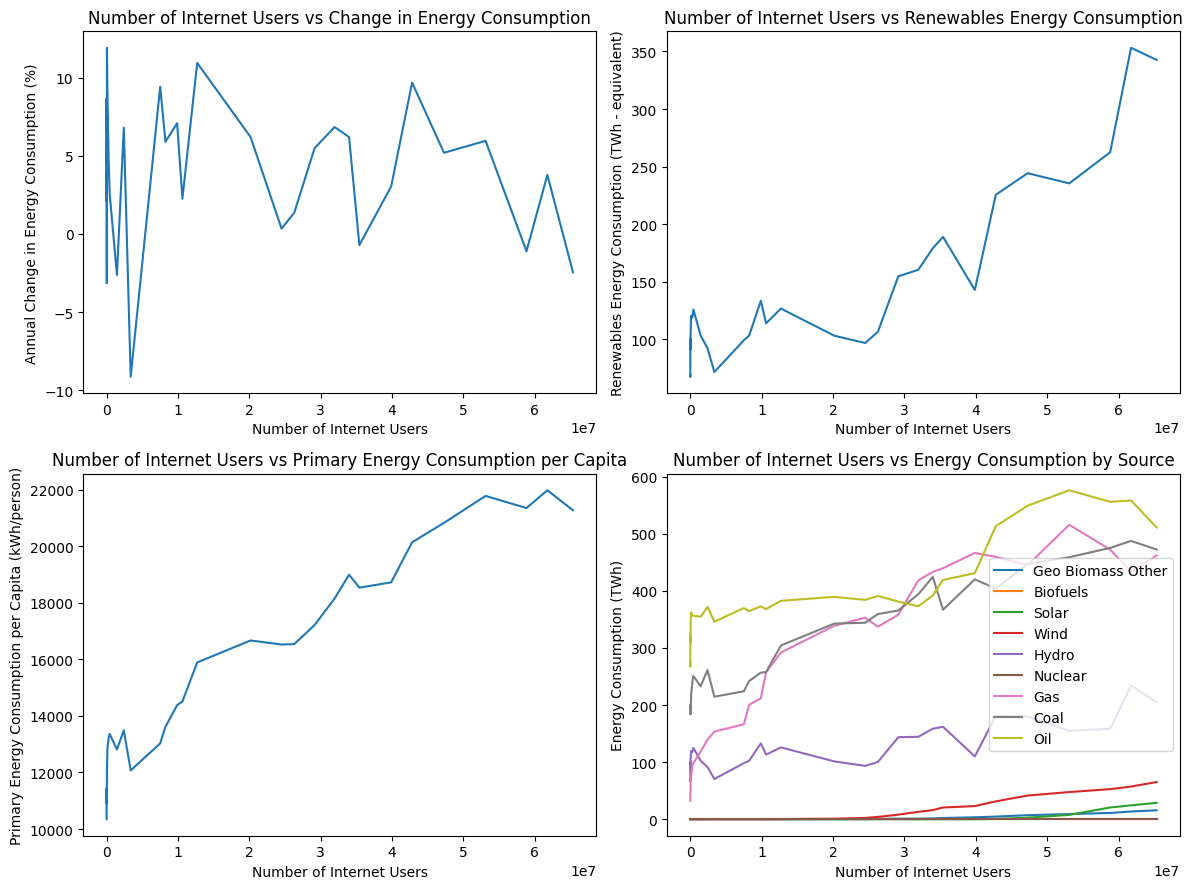

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import os

current_directory = os.getcwd()

internet_users_file = 'number-of-internet-users.csv'
internet_users_df = pd.read_csv(os.path.join(current_directory, internet_users_file))

turkey_internet_users_df = internet_users_df[internet_users_df['Entity'] == 'Turkey']

change_energy_file = 'Change-energy-consumption.csv'
renewables_file = 'primary-energy-renewables.csv'
per_capita_energy_file = 'per-capita-energy-use.csv'
energy_source_file = 'energy-consumption-by-source-and-country.csv'

change_energy_df = pd.read_csv(os.path.join(current_directory, change_energy_file))
renewables_df = pd.read_csv(os.path.join(current_directory, renewables_file))
per_capita_energy_df = pd.read_csv(os.path.join(current_directory, per_capita_energy_file))
energy_source_df = pd.read_csv(os.path.join(current_directory, energy_source_file))

turkey_change_energy_df = change_energy_df[change_energy_df['Entity'] == 'Turkey']
turkey_renewables_df = renewables_df[renewables_df['Entity'] == 'Turkey']
turkey_per_capita_energy_df = per_capita_energy_df[per_capita_energy_df['Entity'] == 'Turkey']
turkey_energy_source_df = energy_source_df[energy_source_df['Entity'] == 'Turkey']


merged_df_change_energy = pd.merge(turkey_internet_users_df, turkey_change_energy_df, on='Year')
merged_df_renewables = pd.merge(turkey_internet_users_df, turkey_renewables_df, on='Year')
merged_df_per_capita_energy = pd.merge(turkey_internet_users_df, turkey_per_capita_energy_df, on='Year')
merged_df_energy_source = pd.merge(turkey_internet_users_df, turkey_energy_source_df, on='Year')


plt.figure(figsize=(12, 9))

plt.subplot(2, 2, 1)
plt.plot(merged_df_change_energy['Number of Internet users'], merged_df_change_energy['Annual change in primary energy consumption (%)'])
plt.xlabel('Number of Internet Users')
plt.ylabel('Annual Change in Energy Consumption (%)')
plt.title('Number of Internet Users vs Change in Energy Consumption')

correlation_coefficient1 = merged_df_change_energy['Number of Internet users'].corr(merged_df_change_energy['Annual change in primary energy consumption (%)'])
print(f'Correlation coefficient for 1st plot: {correlation_coefficient1}')


plt.subplot(2, 2, 2)
plt.plot(merged_df_renewables['Number of Internet users'], merged_df_renewables['Renewables (TWh - equivalent)'])
plt.xlabel('Number of Internet Users')
plt.ylabel('Renewables Energy Consumption (TWh - equivalent)')
plt.title('Number of Internet Users vs Renewables Energy Consumption')

correlation_coefficient2 = merged_df_renewables['Number of Internet users'].corr(merged_df_renewables['Renewables (TWh - equivalent)'])
print(f'Correlation coefficient for 2nd plot: {correlation_coefficient2}')


plt.subplot(2, 2, 3)
plt.plot(merged_df_per_capita_energy['Number of Internet users'], merged_df_per_capita_energy['Primary energy consumption per capita (kWh/person)'])
plt.xlabel('Number of Internet Users')
plt.ylabel('Primary Energy Consumption per Capita (kWh/person)')
plt.title('Number of Internet Users vs Primary Energy Consumption per Capita')

correlation_coefficient3 = merged_df_per_capita_energy['Number of Internet users'].corr(merged_df_per_capita_energy['Primary energy consumption per capita (kWh/person)'])
print(f'Correlation coefficient for 3rd plot: {correlation_coefficient3}')

# 4) Number of Internet Users vs Energy Consumption by Source
plt.subplot(2, 2, 4)
plt.plot(merged_df_energy_source['Number of Internet users'], merged_df_energy_source['Geo Biomass Other - TWh (zero filled)'], label='Geo Biomass Other')
plt.plot(merged_df_energy_source['Number of Internet users'], merged_df_energy_source['Biofuels Consumption - TWh - Total (zero filled)'], label='Biofuels')
plt.plot(merged_df_energy_source['Number of Internet users'], merged_df_energy_source['Solar Consumption - TWh (zero filled)'], label='Solar')
plt.plot(merged_df_energy_source['Number of Internet users'], merged_df_energy_source['Wind Consumption - TWh (zero filled)'], label='Wind')
plt.plot(merged_df_energy_source['Number of Internet users'], merged_df_energy_source['Hydro Consumption - TWh (zero filled)'], label='Hydro')
plt.plot(merged_df_energy_source['Number of Internet users'], merged_df_energy_source['Nuclear Consumption - TWh (zero filled)'], label='Nuclear')
plt.plot(merged_df_energy_source['Number of Internet users'], merged_df_energy_source['Gas Consumption - TWh (zero filled)'], label='Gas')
plt.plot(merged_df_energy_source['Number of Internet users'], merged_df_energy_source['Coal Consumption - TWh (zero filled)'], label='Coal')
plt.plot(merged_df_energy_source['Number of Internet users'], merged_df_energy_source['Oil Consumption - TWh (zero filled)'], label='Oil')

plt.xlabel('Number of Internet Users')
plt.ylabel('Energy Consumption (TWh)')
plt.title('Number of Internet Users vs Energy Consumption by Source')
plt.legend()
correlation_matrix = merged_df_energy_source[['Number of Internet users', 'Geo Biomass Other - TWh (zero filled)', 'Biofuels Consumption - TWh - Total (zero filled)', 'Solar Consumption - TWh (zero filled)', 'Wind Consumption - TWh (zero filled)', 'Hydro Consumption - TWh (zero filled)', 'Nuclear Consumption - TWh (zero filled)', 'Gas Consumption - TWh (zero filled)', 'Coal Consumption - TWh (zero filled)', 'Oil Consumption - TWh (zero filled)']].corr()
print('Correlation matrix for 4th plot:')
print(correlation_matrix)
plt.tight_layout()
plt.show()


Urban x Energy Consumption Regression Results:
Coefficients: [[802.98242006]]
Intercept: [-19160.1267414]
Mean Absolute Error: 17149.197426925497
Mean Squared Error: 832300324.6953332
Root Mean Squared Error: 28849.615676735335
R^2 Score: 0.3041483260936123


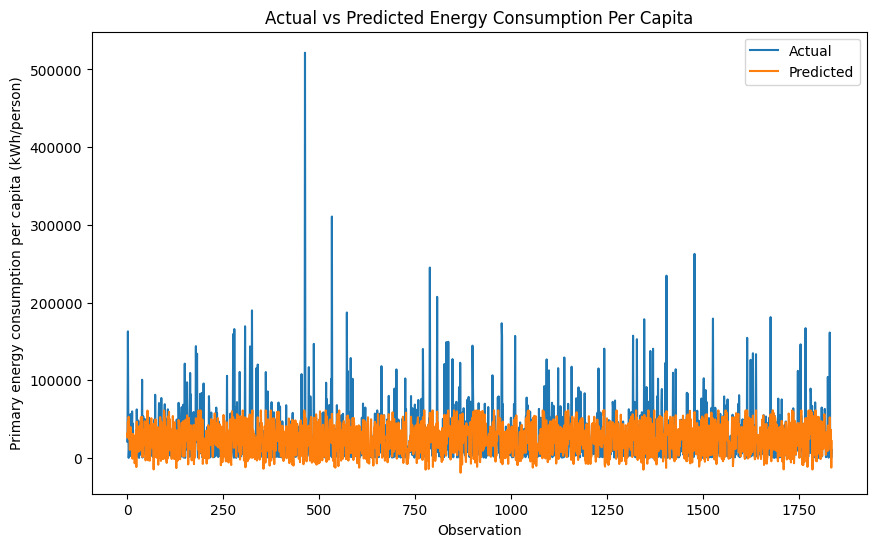

In [39]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

current_directory = os.getcwd()
path_to_per_capita_file = os.path.join(current_directory, 'per-capita-energy-use.csv')
path_to_urbanization_file = os.path.join(current_directory, 'urbanization-last-500-years.csv')

per_capita_df = pd.read_csv(path_to_per_capita_file)
urbanization_df = pd.read_csv(path_to_urbanization_file)

merged_df = pd.merge(urbanization_df, per_capita_df, on=['Entity', 'Code', 'Year'])
X_urban = merged_df['Urban population (%) long-run to 2016 (OWID)'].values.reshape(-1, 1)
y_energy = merged_df['Primary energy consumption per capita (kWh/person)'].values.reshape(-1, 1)

X_urban_train, X_urban_test, y_energy_train, y_energy_test = train_test_split(X_urban, y_energy, test_size=0.2, random_state=0)

urban_model = LinearRegression()
urban_model.fit(X_urban_train, y_energy_train)

y_energy_pred = urban_model.predict(X_urban_test)



print('Urban x Energy Consumption Regression Results:')
print('Coefficients:', urban_model.coef_)
print('Intercept:', urban_model.intercept_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_energy_test, y_energy_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_energy_test, y_energy_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_energy_test, y_energy_pred)))

r_squared = urban_model.score(X_urban_test, y_energy_test)

print('R^2 Score:', r_squared)
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
plt.plot(y_energy_test, label='Actual')
plt.plot(y_energy_pred, label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Primary energy consumption per capita (kWh/person)')
plt.title('Actual vs Predicted Energy Consumption Per Capita')
plt.legend()
plt.show()


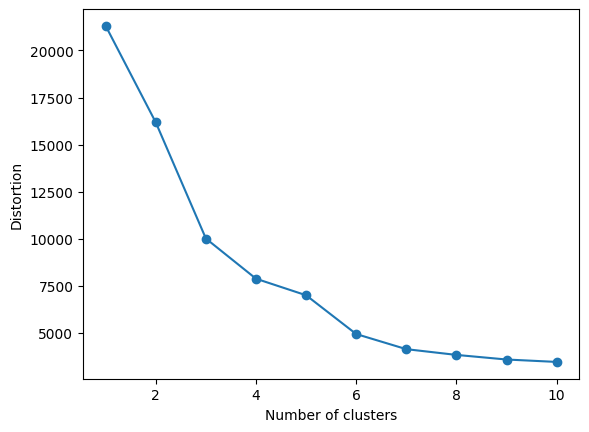

c:\Users\7981\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

current_directory = os.getcwd()


path_to_population = os.path.join(current_directory, 'population-and-demography.csv')
path_to_urbanization = os.path.join(current_directory, 'urbanization-last-500-years.csv')
path_to_internet = os.path.join(current_directory, 'number-of-internet-users.csv')
path_to_energy = os.path.join(current_directory, 'per-capita-energy-use.csv')


population_df = pd.read_csv(path_to_population)
urbanization_df = pd.read_csv(path_to_urbanization)
internet_df = pd.read_csv(path_to_internet)
energy_df = pd.read_csv(path_to_energy)


merged_df = pd.merge(population_df, urbanization_df, left_on=['Country name', 'Year'], right_on=['Entity', 'Year'])
merged_df = pd.merge(merged_df, internet_df, on=['Entity', 'Code', 'Year'])
merged_df = pd.merge(merged_df, energy_df, on=['Entity', 'Code', 'Year'])


df = merged_df[['Population', 'Urban population (%) long-run to 2016 (OWID)', 'Number of Internet users', 'Primary energy consumption per capita (kWh/person)']]


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_scaled)
    distortions.append(km.inertia_)


plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_scaled)


labels = kmeans.labels_


merged_df['Cluster'] = labels


Technology x Energy Consumption Regression Results:
Coefficients: [[5.50045913e-05]]
Intercept: [1023.36688574]
Mean Absolute Error: 1961.7977998187132
Mean Squared Error: 36055078.016122
Root Mean Squared Error: 6004.588080469966
R^2 Score: 0.7024330563529297


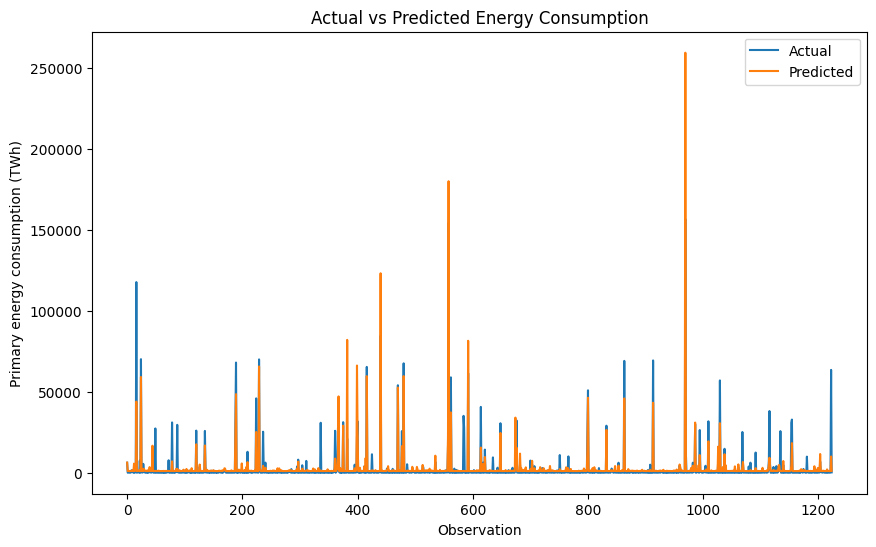

In [41]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

current_directory = os.getcwd()
path_to_per_capita_file = os.path.join(current_directory, 'primary-energy-cons.csv')
path_to_internet_file = os.path.join(current_directory, 'number-of-internet-users.csv')

per_capita_df = pd.read_csv(path_to_per_capita_file)
internet_df = pd.read_csv(path_to_internet_file)

merged_df = pd.merge(internet_df, per_capita_df, on=['Entity', 'Code', 'Year'])
X_urban = merged_df['Number of Internet users'].values.reshape(-1, 1)
y_energy = merged_df['Primary energy consumption (TWh)'].values.reshape(-1, 1)

X_urban_train, X_urban_test, y_energy_train, y_energy_test = train_test_split(X_urban, y_energy, test_size=0.2, random_state=0)

urban_model = LinearRegression()
urban_model.fit(X_urban_train, y_energy_train)

y_energy_pred = urban_model.predict(X_urban_test)


print('Technology x Energy Consumption Regression Results:')
print('Coefficients:', urban_model.coef_)
print('Intercept:', urban_model.intercept_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_energy_test, y_energy_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_energy_test, y_energy_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_energy_test, y_energy_pred)))

r_squared = urban_model.score(X_urban_test, y_energy_test)

print('R^2 Score:', r_squared)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_energy_test, label='Actual')
plt.plot(y_energy_pred, label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Primary energy consumption (TWh)')
plt.title('Actual vs Predicted Energy Consumption')
plt.legend()
plt.show()





For predictors ('Electricity demand (TWh)', 'Number of Internet users', 'Urban population (%) long-run to 2016 (OWID)'):
Coefficients: [ 0.09659229 -0.09557752  0.52312469]
Intercept: -2.532501356093799e-18


For predictors ('Electricity demand (TWh)', 'Number of Internet users', 'Population'):
Coefficients: [ 0.40104317 -0.11193748 -0.30164326]
Intercept: -7.9616581489238e-17


For predictors ('Electricity demand (TWh)', 'Urban population (%) long-run to 2016 (OWID)', 'Population'):
Coefficients: [ 0.08774825  0.51665585 -0.08971568]
Intercept: -2.8264897930043142e-18


For predictors ('Number of Internet users', 'Urban population (%) long-run to 2016 (OWID)', 'Population'):
Coefficients: [ 0.01433995  0.5230735  -0.0231088 ]
Intercept: 2.602496824961963e-18


For predictors ('Electricity demand (TWh)', 'Number of Internet users', 'Urban population (%) long-run to 2016 (OWID)', 'Population'):
Coefficients: [ 0.16299124 -0.08643869  0.516098   -0.08350892]
Intercept: -6.99298359561376e

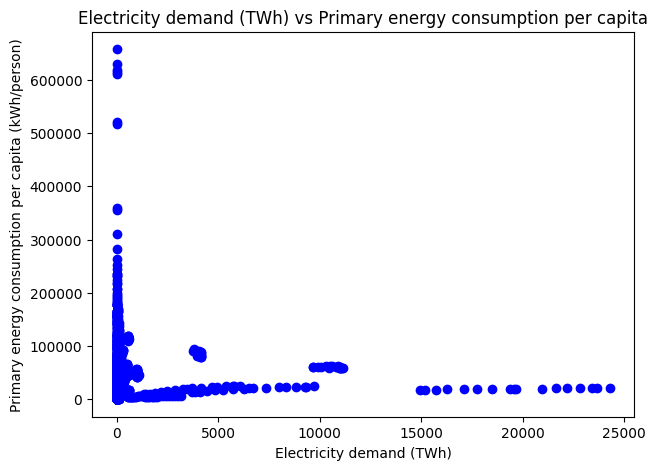

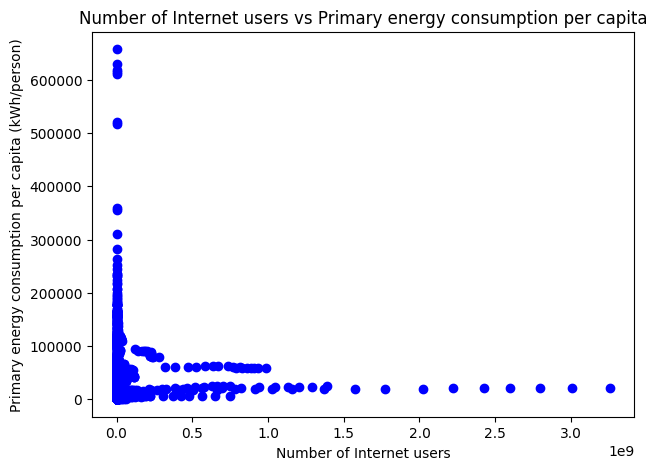

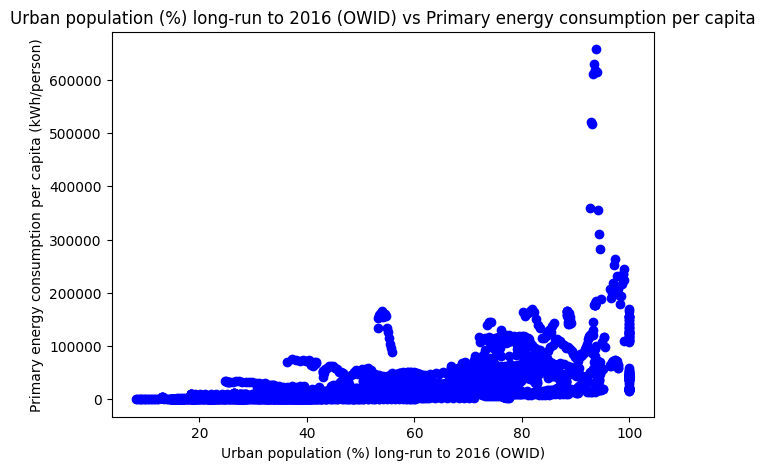

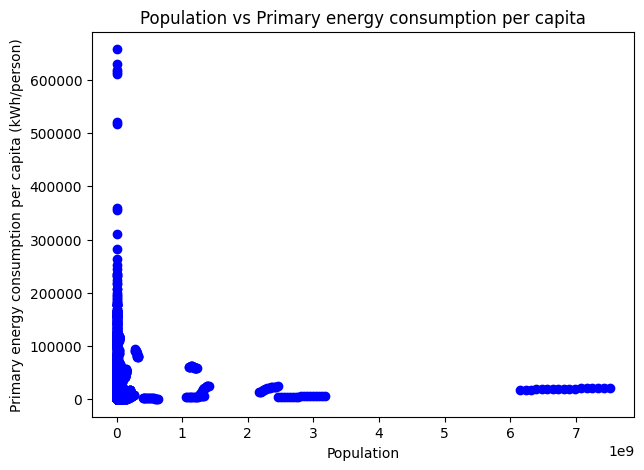

In [42]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from itertools import combinations
import matplotlib.pyplot as plt
import os

current_directory = os.getcwd()


path_to_population = os.path.join(current_directory, 'population-and-demography.csv')
path_to_urbanization = os.path.join(current_directory, 'urbanization-last-500-years.csv')
path_to_internet = os.path.join(current_directory, 'number-of-internet-users.csv')
path_to_energy = os.path.join(current_directory, 'per-capita-energy-use.csv')
path_to_electricity = os.path.join(current_directory, 'Electricity-demand.csv')

population_df = pd.read_csv(path_to_population)
urbanization_df = pd.read_csv(path_to_urbanization)
internet_df = pd.read_csv(path_to_internet)
energy_df = pd.read_csv(path_to_energy)
electricity_df = pd.read_csv(path_to_electricity)


merged_df = pd.merge(population_df, urbanization_df, left_on=['Country name', 'Year'], right_on=['Entity', 'Year'])
merged_df = pd.merge(merged_df, internet_df, on=['Entity', 'Year'])
merged_df = pd.merge(merged_df, energy_df, on=['Entity', 'Year'])
merged_df = pd.merge(merged_df, electricity_df, left_on=['Entity', 'Code', 'Year'], right_on=['Entity', 'Code', 'Year'])


predictors = ['Electricity demand (TWh)', 'Number of Internet users', 'Urban population (%) long-run to 2016 (OWID)', 'Population']
Y = merged_df['Primary energy consumption per capita (kWh/person)']

combinations_3_4 = list(combinations(predictors, 3)) + list(combinations(predictors, 4))

for combo in combinations_3_4:
    X = merged_df[list(combo)]

    scaler = StandardScaler()

    X_scaled = scaler.fit_transform(X)
    Y_scaled = (Y - np.mean(Y)) / np.std(Y)

    regr = LinearRegression()
    regr.fit(X_scaled, Y_scaled)

    print(f"For predictors {combo}:")
    print("Coefficients:", regr.coef_)
    print("Intercept:", regr.intercept_)
    print("\n")

for predictor in predictors:
    plt.figure(figsize=(7, 5))
    plt.scatter(merged_df[predictor], Y, color='blue')
    plt.title(f'{predictor} vs Primary energy consumption per capita')
    plt.xlabel(predictor)
    plt.ylabel('Primary energy consumption per capita (kWh/person)')
    plt.show()


Population x Energy Consumption Per Capita Regression Results:
Coefficients: [[1.75205058e-05]]
Intercept: [68.88810692]
Mean Absolute Error: 1111.5308841045862
Mean Squared Error: 20248994.20267369
Root Mean Squared Error: 4499.888243353794
R^2 Score: 0.7516632944742131


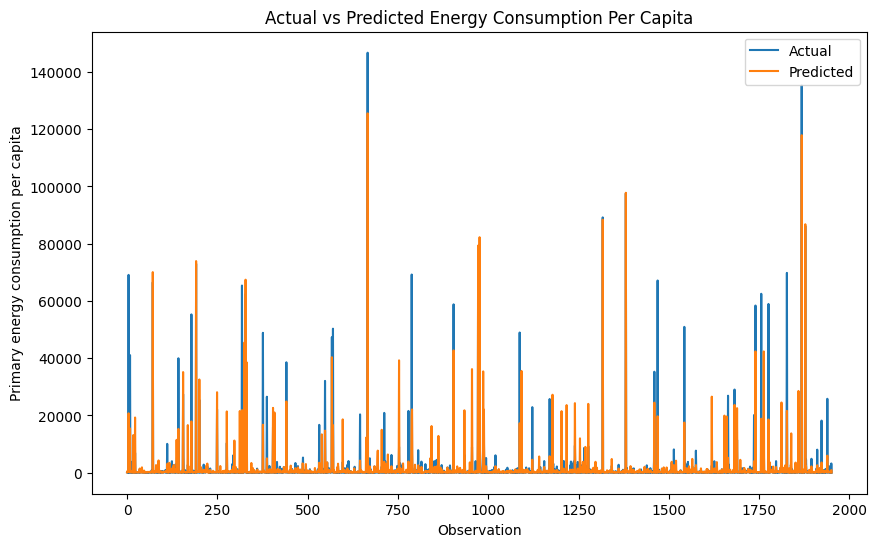

In [43]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

current_directory = os.getcwd()
path_to_energy_file = os.path.join(current_directory, 'primary-energy-cons.csv')
path_to_pop_file = os.path.join(current_directory, 'population-and-demography.csv')

energy_df = pd.read_csv(path_to_energy_file)
pop_df = pd.read_csv(path_to_pop_file)


merged_df = pd.merge(pop_df, energy_df, left_on=['Country name', 'Year'], right_on=['Entity', 'Year'])

X_pop = merged_df['Population'].values.reshape(-1, 1)
y_energy = merged_df['Primary energy consumption (TWh)'].values.reshape(-1, 1)

X_pop_train, X_pop_test, y_energy_train, y_energy_test = train_test_split(X_pop, y_energy, test_size=0.2, random_state=0)

pop_model = LinearRegression()
pop_model.fit(X_pop_train, y_energy_train)

y_energy_pred = pop_model.predict(X_pop_test)

# population x energy consumption için regresyon sonuçları
print('Population x Energy Consumption Per Capita Regression Results:')
print('Coefficients:', pop_model.coef_)
print('Intercept:', pop_model.intercept_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_energy_test, y_energy_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_energy_test, y_energy_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_energy_test, y_energy_pred)))

r_squared = pop_model.score(X_pop_test, y_energy_test)

print('R^2 Score:', r_squared)

# Gerçek ve tahmin edilen değerlerin çizgi grafiği
plt.figure(figsize=(10,6))
plt.plot(y_energy_test, label='Actual')
plt.plot(y_energy_pred, label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Primary energy consumption per capita')
plt.title('Actual vs Predicted Energy Consumption Per Capita')
plt.legend()
plt.show()



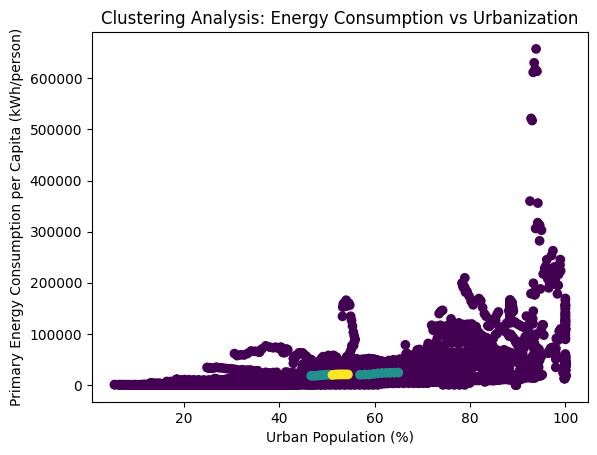

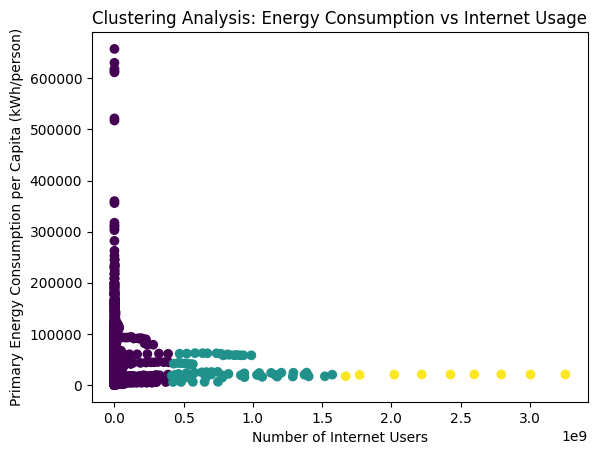

In [44]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

current_directory = os.getcwd()
path_to_per_capita_file = os.path.join(current_directory, 'per-capita-energy-use.csv')
path_to_urbanization_file = os.path.join(current_directory, 'urbanization-last-500-years.csv')
path_to_internet_file = os.path.join(current_directory, 'number-of-internet-users.csv')

per_capita_df = pd.read_csv(path_to_per_capita_file)
urbanization_df = pd.read_csv(path_to_urbanization_file)
internet_df = pd.read_csv(path_to_internet_file)


merged_df = pd.merge(per_capita_df, urbanization_df, on=['Entity', 'Code', 'Year'])
merged_df = pd.merge(merged_df, internet_df, on=['Entity', 'Code', 'Year'])

X = merged_df[['Primary energy consumption per capita (kWh/person)', 'Urban population (%) long-run to 2016 (OWID)', 'Number of Internet users']]


kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

clusters = kmeans.predict(X)


merged_df['Cluster'] = clusters


plt.scatter(merged_df['Urban population (%) long-run to 2016 (OWID)'], merged_df['Primary energy consumption per capita (kWh/person)'], c=clusters)
plt.xlabel('Urban Population (%)')
plt.ylabel('Primary Energy Consumption per Capita (kWh/person)')
plt.title('Clustering Analysis: Energy Consumption vs Urbanization')
plt.show()

plt.scatter(merged_df['Number of Internet users'], merged_df['Primary energy consumption per capita (kWh/person)'], c=clusters)
plt.xlabel('Number of Internet Users')
plt.ylabel('Primary Energy Consumption per Capita (kWh/person)')
plt.title('Clustering Analysis: Energy Consumption vs Internet Usage')
plt.show()


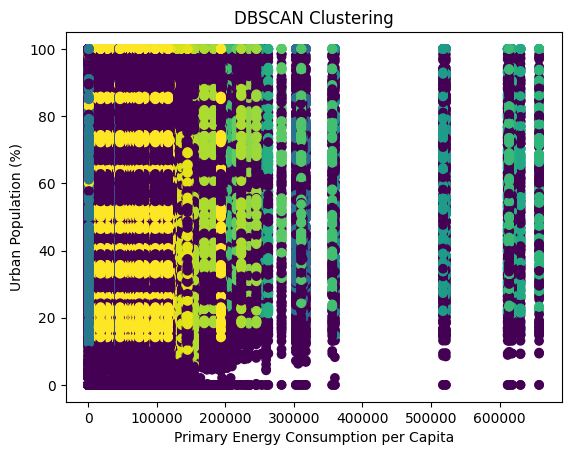

In [45]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

current_directory = os.getcwd()
path_to_per_capita_file = os.path.join(current_directory, 'per-capita-energy-use.csv')
path_to_urbanization_file = os.path.join(current_directory, 'urbanization-last-500-years.csv')

per_capita_df = pd.read_csv(path_to_per_capita_file)
urbanization_df = pd.read_csv(path_to_urbanization_file)

merged_df = pd.merge(per_capita_df, urbanization_df, on=['Year'])

# Kullanacağımız sütunlar
X = merged_df[['Primary energy consumption per capita (kWh/person)', 'Urban population (%) long-run to 2016 (OWID)']]

# DBSCAN modelini oluşturma
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Kümeleme sonuçlarını görselleştirme
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel('Primary Energy Consumption per Capita')
plt.ylabel('Urban Population (%)')
plt.title('DBSCAN Clustering')
plt.show()
